# **Data Daily Fitbit LIfeSnaps**

## **1. Load Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

In [ ]:
df=pd.read_csv("daily_fitbit_sema_df_unprocessed.csv")
df

,Unnamed: 0,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
0,0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,7405,621e362467b776a2404ad513,2021-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7406,7406,621e36f967b776a240e5e7c9,2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7407,7407,621e362467b776a2404ad513,2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7408,7408,621e339967b776a240e502de,2021-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
column_names = df.columns.tolist()
len(column_names)

63

**cek duplikat**

In [ ]:
df.duplicated().sum()

np.int64(0)

**cek presentasi missing value**

In [ ]:
missing_values = df.isnull().mean() * 100
print("Jumlah kolom yang mempunyai nilai NaN > 0: ", missing_values)
missing_table = missing_values[missing_values > 0]
print("Jumlah kolom yang mempunyai nilai NaN > 0: ", len(missing_table))
print(missing_table)

Jumlah kolom yang mempunyai nilai NaN > 0:  Unnamed: 0              0.000000
id                      0.000000
date                    0.000000
nightly_temperature    54.669366
nremhr                 66.599190
                         ...    
HOME_OFFICE            69.095816
OTHER                  69.095816
OUTDOORS               69.095816
TRANSIT                69.095816
WORK/SCHOOL            69.095816
Length: 63, dtype: float64
Jumlah kolom yang mempunyai nilai NaN > 0:  60
nightly_temperature                 54.669366
nremhr                              66.599190
rmssd                               66.599190
spo2                                82.860999
full_sleep_breathing_rate           66.329285
stress_score                        74.682861
sleep_points_percentage             74.682861
exertion_points_percentage          74.682861
responsiveness_points_percentage    74.682861
daily_temperature_variation         55.411606
badgeType                           93.049933
calories     

**pola missing values**

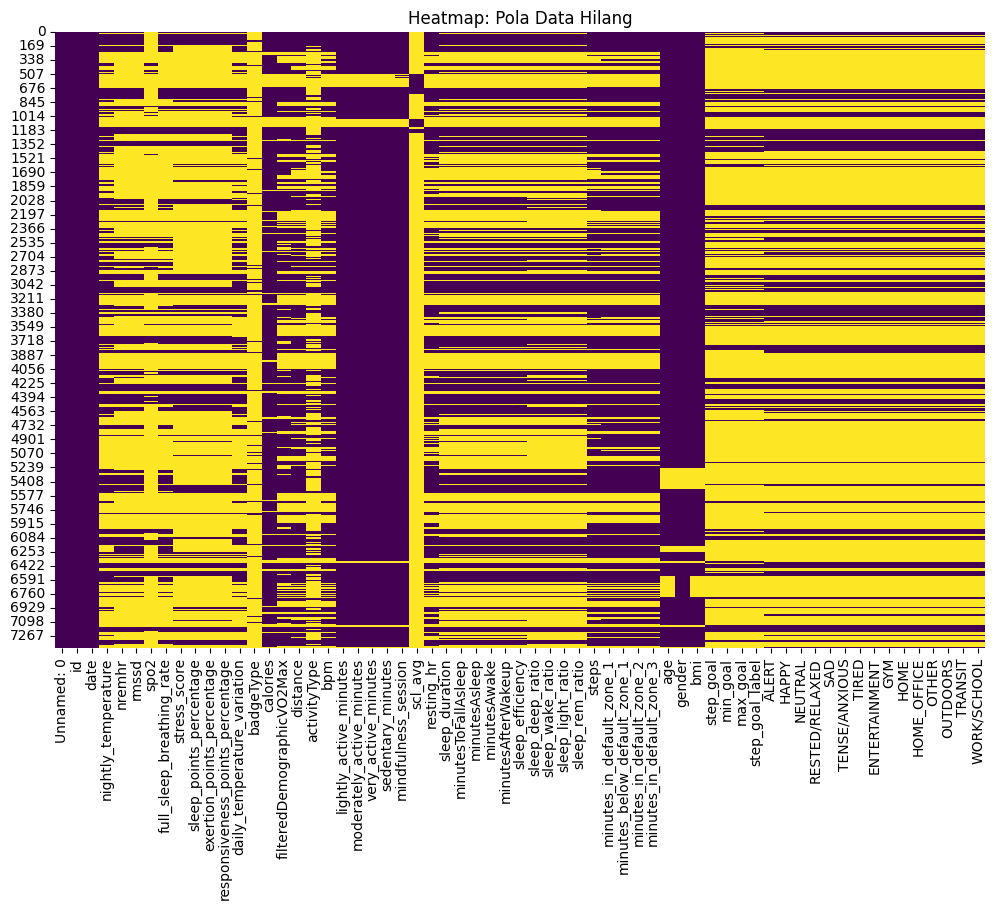

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


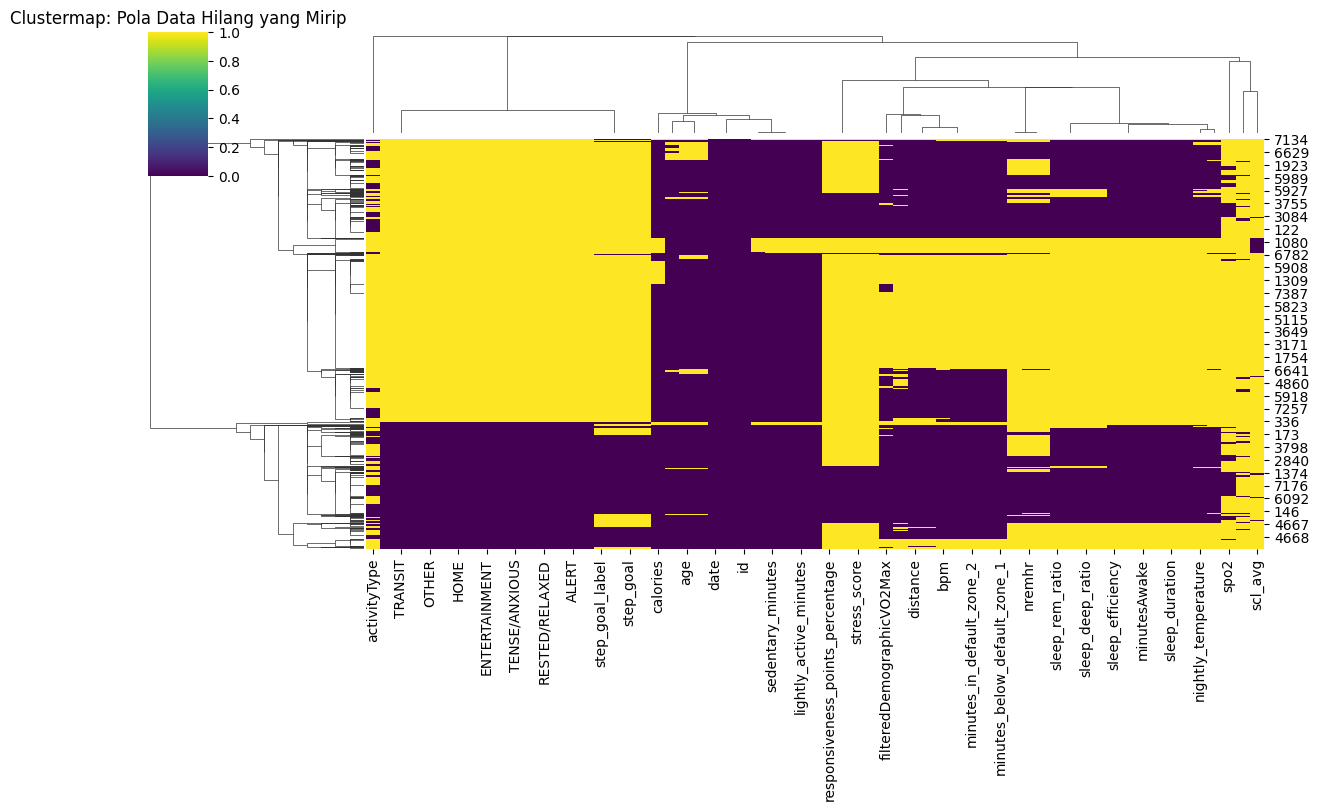

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys # Import the sys module

# Load data Fitbit
# Ganti dengan nama file kamu

# 1. Buat DataFrame baru yang hanya berisi informasi data hilang (True/False)
missing_df = df.isnull()

# 2. Visualisasikan dengan Heatmap:
plt.figure(figsize=(12, 8))
sns.heatmap(missing_df, cmap="viridis", cbar=False)  # cbar=False untuk menghilangkan color bar
plt.title("Heatmap: Pola Data Hilang")
plt.show()

# 3. Clustering dengan Dendrogram (untuk melihat pola yang mirip):
# Import library clustermap dari seaborn

# Increase the recursion depth limit
sys.setrecursionlimit(3000) # You might need to adjust this value

sns.clustermap(missing_df, cmap="viridis", metric="hamming", method="single", figsize=(12, 8))
plt.title("Clustermap: Pola Data Hilang yang Mirip")
plt.show()

**drop missing values > 50%**

In [ ]:

missing_table_4 = missing_values[(missing_values > 50)]
print("Jumlah kolom yang mempunyai nilai NaN lebih dari 50% : ", len(missing_table_4))
print(missing_table_4)


Jumlah kolom yang mempunyai nilai NaN lebih dari 50% :  42
nightly_temperature                 54.669366
nremhr                              66.599190
rmssd                               66.599190
spo2                                82.860999
full_sleep_breathing_rate           66.329285
stress_score                        74.682861
sleep_points_percentage             74.682861
exertion_points_percentage          74.682861
responsiveness_points_percentage    74.682861
daily_temperature_variation         55.411606
badgeType                           93.049933
activityType                        70.134953
scl_avg                             94.871795
sleep_duration                      52.078273
minutesToFallAsleep                 52.078273
minutesAsleep                       52.078273
minutesAwake                        52.078273
minutesAfterWakeup                  52.078273
sleep_efficiency                    52.078273
sleep_deep_ratio                    55.546559
sleep_wake_ratio     

In [ ]:
df.drop(columns=missing_table_4.index, inplace=True)
df

,Unnamed: 0,id,date,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,...,mindfulness_session,resting_hr,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi
0,0,621e2e8e67b776a24055b564,2021-05-24,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,...,False,62.073070,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19
1,1,621e2e8e67b776a24055b564,2021-05-25,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,...,False,62.121476,9727.0,56.0,1374.0,4.0,0.0,<30,MALE,<19
2,2,621e2e8e67b776a24055b564,2021-05-26,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,...,False,62.263999,8253.0,85.0,1350.0,0.0,0.0,<30,MALE,<19
3,3,621e2e8e67b776a24055b564,2021-05-27,2325.10,62.47493,6653.1,71.725477,133.0,21.0,37.0,...,False,62.368900,9015.0,90.0,1282.0,0.0,0.0,<30,MALE,<19
4,4,621e2e8e67b776a24055b564,2021-05-28,2586.76,62.41166,9557.9,74.401028,136.0,42.0,54.0,...,False,61.965409,12949.0,146.0,1274.0,4.0,0.0,<30,MALE,<19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,7405,621e362467b776a2404ad513,2021-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7406,7406,621e36f967b776a240e5e7c9,2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7407,7407,621e362467b776a2404ad513,2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7408,7408,621e339967b776a240e502de,2021-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)


**ubah nama kolom**

In [ ]:
df2 = df.copy()

In [ ]:


df2.rename(columns={
    'date': 'tanggal',
    'calories': 'kalori',
    'filteredDemographicVO2Max': 'VO2Max_demografis_terfilter',
    'distance': 'jarak',
    'bpm': 'detak_jantung_per_menit',
    'lightly_active_minutes': 'menit_aktivitas_ringan',
    'moderately_active_minutes': 'menit_aktivitas_sedang',
    'very_active_minutes': 'menit_aktivitas_berat',
    'sedentary_minutes': 'menit_sedentari',
    'mindfulness_session': 'sesi_mindfulness',
    'resting_hr': 'detak_jantung_istirahat',
    'steps': 'langkah',
    'minutes_in_default_zone_1': 'menit_di_zona_default_1',
    'minutes_below_default_zone_1': 'menit_di_bawah_zona_default_1',
    'minutes_in_default_zone_2': 'menit_di_zona_default_2',
    'minutes_in_default_zone_3': 'menit_di_zona_default_3',
    'age': 'usia',
    'gender': 'jenis_kelamin',
    'bm': 'indeks_massa_tubuh'
}, inplace=True)


In [ ]:
df2

,id,tanggal,kalori,VO2Max_demografis_terfilter,jarak,detak_jantung_per_menit,menit_aktivitas_ringan,menit_aktivitas_sedang,menit_aktivitas_berat,menit_sedentari,sesi_mindfulness,detak_jantung_istirahat,langkah,menit_di_zona_default_1,menit_di_bawah_zona_default_1,menit_di_zona_default_2,menit_di_zona_default_3,usia,jenis_kelamin,bmi
0,621e2e8e67b776a24055b564,2021-05-24,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,False,62.073070,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19
1,621e2e8e67b776a24055b564,2021-05-25,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,False,62.121476,9727.0,56.0,1374.0,4.0,0.0,<30,MALE,<19
2,621e2e8e67b776a24055b564,2021-05-26,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,False,62.263999,8253.0,85.0,1350.0,0.0,0.0,<30,MALE,<19
3,621e2e8e67b776a24055b564,2021-05-27,2325.10,62.47493,6653.1,71.725477,133.0,21.0,37.0,622.0,False,62.368900,9015.0,90.0,1282.0,0.0,0.0,<30,MALE,<19
4,621e2e8e67b776a24055b564,2021-05-28,2586.76,62.41166,9557.9,74.401028,136.0,42.0,54.0,647.0,False,61.965409,12949.0,146.0,1274.0,4.0,0.0,<30,MALE,<19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,621e362467b776a2404ad513,2021-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7406,621e36f967b776a240e5e7c9,2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7407,621e362467b776a2404ad513,2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7408,621e339967b776a240e502de,2021-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


| No | Fitur                              | Pengertian                                                          |
| -- | ---------------------------------- | ------------------------------------------------------------------- |
| 1  | id                                 | Identitas unik untuk tiap pengguna (71 Pengguna)                    |
| 2  | tanggal                            | Tanggal pengambilan data                                            |
| 3  | kalori                             | Jumlah kalori yang dibakar dalam sehari                             |
| 4  | VO2Max\_demografis\_terfilter      | Estimasi VO2Max berdasarkan data demografis yang sudah difilter     |
| 5  | jarak                              | Total jarak yang ditempuh dalam sehari (dalam kilometer atau meter) |
| 6  | detak\_jantung\_per\_menit         | Detak jantung rata-rata per menit saat aktivitas                    |
| 7  | menit\_aktivitas\_ringan           | Durasi aktivitas fisik ringan dalam menit                           |
| 8  | menit\_aktivitas\_sedang           | Durasi aktivitas fisik sedang dalam menit                           |
| 9  | menit\_aktivitas\_berat            | Durasi aktivitas fisik berat dalam menit                            |
| 10 | menit\_sedentari                   | Durasi tidak aktif (duduk/tidur) dalam menit                        |
| 11 | sesi\_mindfulness                  | Jumlah sesi mindfulness atau meditasi                               |
| 12 | detak\_jantung\_istirahat          | Detak jantung rata-rata saat istirahat                              |
| 13 | langkah                            | Jumlah langkah yang diambil dalam sehari                            |
| 14 | menit\_di\_zona\_default\_1        | Waktu dalam menit di zona detak jantung default 1                   |
| 15 | menit\_di\_bawah\_zona\_default\_1 | Waktu dalam menit di bawah zona detak jantung default 1             |
| 16 | menit\_di\_zona\_default\_2        | Waktu dalam menit di zona detak jantung default 2                   |
| 17 | menit\_di\_zona\_default\_3        | Waktu dalam menit di zona detak jantung default 3                   |
| 18 | usia                               | Usia pengguna (dalam tahun)                                         |
| 19 | jenis\_kelamin                     | Jenis kelamin pengguna (Laki-laki/Perempuan)                        |
| 20 | indeks\_massa\_tubuh               | Indeks Massa Tubuh (BMI) berdasarkan berat dan tinggi badan         |


In [ ]:
df2.dtypes

,0
id,object
tanggal,object
kalori,float64
VO2Max_demografis_terfilter,float64
jarak,float64
detak_jantung_per_menit,float64
menit_aktivitas_ringan,float64
menit_aktivitas_sedang,float64
menit_aktivitas_berat,float64
menit_sedentari,float64


In [ ]:
df2.nunique()

,0
id,71
tanggal,283
kalori,4657
VO2Max_demografis_terfilter,4626
jarak,4545
detak_jantung_per_menit,4799
menit_aktivitas_ringan,456
menit_aktivitas_sedang,151
menit_aktivitas_berat,168
menit_sedentari,1010


**ubah tipe data**

In [ ]:
import pandas as pd


df2['tanggal'] = pd.to_datetime(df2['tanggal'], errors='coerce')
df2['sesi_mindfulness'] = df2['sesi_mindfulness'].astype('category')
df2['usia'] = df2['usia'].astype('category')
df2['jenis_kelamin'] = df2['jenis_kelamin'].astype('category')
df2['bmi'] = df2['bmi'].astype('category')

df2.dtypes


,0
id,object
tanggal,datetime64[ns]
kalori,float64
VO2Max_demografis_terfilter,float64
jarak,float64
detak_jantung_per_menit,float64
menit_aktivitas_ringan,float64
menit_aktivitas_sedang,float64
menit_aktivitas_berat,float64
menit_sedentari,float64


**distribusi data**

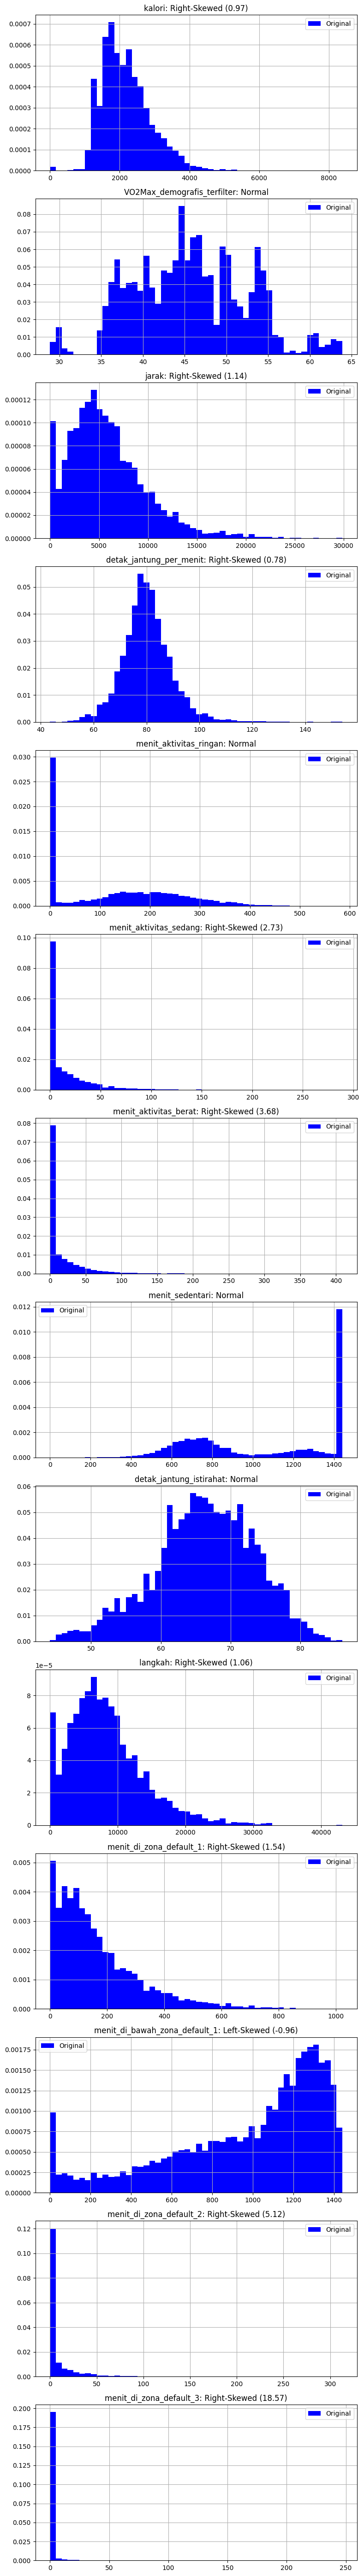

In [ ]:
numeric_cols = [col for col in df2.columns.to_list() if pd.api.types.is_numeric_dtype(df2[col])]
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 4 * len(numeric_cols)))

if len(numeric_cols) == 1:
    axes = [axes]

normal_ = []
left_skewed = []
right_skewed = []
for ax, col in zip(axes, numeric_cols):
    skewness = skew(df2[col].dropna())
    if abs(skewness) < 0.5:
        title = f"{col}: Normal"
        normal_.append(col)
    elif skewness > 0:
        title = f"{col}: Right-Skewed ({skewness:.2f})"
        right_skewed.append(col)
    else:
        title = f"{col}: Left-Skewed ({skewness:.2f})"
        left_skewed.append(col)
    df2[col].hist(bins=50, ax=ax, density=True, color='blue', label="Original")
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()

## 2. **Handling Missing Values (Imputasi)**

In [ ]:
df2.isnull().sum()

,0
id,0
tanggal,0
kalori,750
VO2Max_demografis_terfilter,2617
jarak,2633
detak_jantung_per_menit,2606
menit_aktivitas_ringan,327
menit_aktivitas_sedang,327
menit_aktivitas_berat,327
menit_sedentari,327


###**kategorikal**

In [ ]:
kolom_kategorikal = df2.select_dtypes(include=['category']).columns
kolom_kategorikal

Index(['sesi_mindfulness', 'usia', 'jenis_kelamin', 'bmi'], dtype='object')

In [ ]:
kolom_numerik = df2.select_dtypes(include=['float64']).columns
kolom_numerik

Index(['kalori', 'VO2Max_demografis_terfilter', 'jarak',
       'detak_jantung_per_menit', 'menit_aktivitas_ringan',
       'menit_aktivitas_sedang', 'menit_aktivitas_berat', 'menit_sedentari',
       'detak_jantung_istirahat', 'langkah', 'menit_di_zona_default_1',
       'menit_di_bawah_zona_default_1', 'menit_di_zona_default_2',
       'menit_di_zona_default_3'],
      dtype='object')

## 2. 1 Handling Kategorikal

**identikasi user yang tidak lengkap pada tiap kolom kategorikal**

In [ ]:

# Dictionary untuk menyimpan user kosong per kolom
user_kosong_per_kolom = {}

for kolom in kolom_kategorikal:
    user_kosong = []

    for user_id in df2['id'].unique():
        user_data = df2[df2['id'] == user_id][kolom]


        if user_data.isna().all():
            user_kosong.append(user_id)

    user_kosong_per_kolom[kolom] = user_kosong

for kolom, users in user_kosong_per_kolom.items():
    print(f"User dengan semua data kosong di kolom '{kolom}':")
    print(users)
    print()


User dengan semua data kosong di kolom 'sesi_mindfulness':
[]

User dengan semua data kosong di kolom 'usia':
['621e346f67b776a24081744f', '621e356967b776a24027bd9f', '621e367e67b776a24087d75d']

User dengan semua data kosong di kolom 'jenis_kelamin':
['621e346f67b776a24081744f', '621e356967b776a24027bd9f']

User dengan semua data kosong di kolom 'bmi':
['621e346f67b776a24081744f', '621e356967b776a24027bd9f', '621e367e67b776a24087d75d']



**Pengisian Modus untuk kategorikal berdasarkan data user yang ada**

In [ ]:
df2[kolom_kategorikal]

,sesi_mindfulness,usia,jenis_kelamin,bmi
0,False,<30,MALE,<19
1,False,<30,MALE,<19
2,False,<30,MALE,<19
3,False,<30,MALE,<19
4,False,<30,MALE,<19
...,...,...,...,...
7405,NaN,NaN,NaN,NaN
7406,NaN,NaN,NaN,NaN
7407,NaN,NaN,NaN,NaN
7408,NaN,NaN,NaN,NaN


In [ ]:
df2[kolom_kategorikal].isna().sum()

,0
sesi_mindfulness,299
usia,614
jenis_kelamin,370
bmi,614


In [ ]:
# Menambahkan kolom 'id' dari df_cleaned ke df_kategorikal_cleaned
df_kategorikal_cleaned = df2[['id'] + list(kolom_kategorikal)].copy()

# Menghitung modus global untuk setiap kolom kategorikal
modus_global = df_kategorikal_cleaned[kolom_kategorikal].mode().iloc[0]

# Melakukan imputasi pada kolom kategorikal
for kolom in kolom_kategorikal:
    for user_id in df_kategorikal_cleaned['id'].unique():
        user_data = df_kategorikal_cleaned[df_kategorikal_cleaned['id'] == user_id]

        # Jika seluruh data kosong di kolom ini, isi dengan modus global
        if user_data[kolom].isna().all():
            df_kategorikal_cleaned.loc[
                df_kategorikal_cleaned['id'] == user_id, kolom] = modus_global[kolom]
        else:
            # Jika user memiliki beberapa data yang ada, gunakan modus dari data yang ada
            valid_data = user_data[kolom].dropna()  # Mengambil data non-NaN untuk modus
            if not valid_data.empty:
                modus_user = valid_data.mode()
                if not modus_user.empty:
                    nilai_modus = modus_user.iloc[0]
                    df_kategorikal_cleaned.loc[
                        (df_kategorikal_cleaned['id'] == user_id) & (df_kategorikal_cleaned[kolom].isna()),
                        kolom] = nilai_modus
            else:
                # Jika semua data kosong, gunakan modus global
                df_kategorikal_cleaned.loc[
                    df_kategorikal_cleaned['id'] == user_id, kolom] = modus_global[kolom]

# Cek hasilnya
df_kategorikal_cleaned.isna().sum()  # Pastikan tidak ada missing lagi


,0
id,0
sesi_mindfulness,0
usia,0
jenis_kelamin,0
bmi,0


## 2.2 Imputasi Kolom Numerik

berdasarkan penelitian Shweta Chakrabarti dan rekan-rekannya yang berjudul **"Binned Data Provide Better Imputation of Missing Time Series Data from Wearables"**, imputasi missing values yang dilakukan adalah
1. Metode **Expectation Maximization (EM)**
2. Metode **Simple Imputer (SI)** -> terbaik menurut jurnal
3. Metode **Iterative Imputer (II)**
4. Metode **K-Nearest Neighbor (kNN)**
5. Metode **Random Forest (RF)**

cek user kalau punya kolom yang kosong full

In [ ]:
# Dictionary untuk menyimpan user kosong per kolom numerik
user_kosong_numerik_per_kolom = {}

# Iterasi per kolom numerik
for kolom in kolom_numerik:
    user_kosong = []

    for user_id in df2['id'].unique():
        user_data = df2[df2['id'] == user_id][kolom]
        if user_data.isna().all():
            user_kosong.append(user_id)

    user_kosong_numerik_per_kolom[kolom] = user_kosong
for kolom, users in user_kosong_numerik_per_kolom.items():
    print(f"User dengan semua data kosong di kolom numerik '{kolom}':")
    print(users)
    print()


User dengan semua data kosong di kolom numerik 'kalori':
[]

User dengan semua data kosong di kolom numerik 'VO2Max_demografis_terfilter':
[]

User dengan semua data kosong di kolom numerik 'jarak':
[]

User dengan semua data kosong di kolom numerik 'detak_jantung_per_menit':
[]

User dengan semua data kosong di kolom numerik 'menit_aktivitas_ringan':
[]

User dengan semua data kosong di kolom numerik 'menit_aktivitas_sedang':
[]

User dengan semua data kosong di kolom numerik 'menit_aktivitas_berat':
[]

User dengan semua data kosong di kolom numerik 'menit_sedentari':
[]

User dengan semua data kosong di kolom numerik 'detak_jantung_istirahat':
[]

User dengan semua data kosong di kolom numerik 'langkah':
[]

User dengan semua data kosong di kolom numerik 'menit_di_zona_default_1':
[]

User dengan semua data kosong di kolom numerik 'menit_di_bawah_zona_default_1':
[]

User dengan semua data kosong di kolom numerik 'menit_di_zona_default_2':
[]

User dengan semua data kosong di kolom 

In [ ]:
df2[kolom_numerik].isna().sum()

,0
kalori,750
VO2Max_demografis_terfilter,2617
jarak,2633
detak_jantung_per_menit,2606
menit_aktivitas_ringan,327
menit_aktivitas_sedang,327
menit_aktivitas_berat,327
menit_sedentari,327
detak_jantung_istirahat,2988
langkah,2633


**Metode KNN**

In [ ]:
!pip install impyute

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

# Pastikan kolom date bertipe datetime
df2['tanggal'] = pd.to_datetime(df2['tanggal'])

# Kolom yang ingin diimputasi (numerik)
kolom_imputasi = kolom_numerik

# DataFrame untuk hasil imputasi
df_numerik_cleaned = pd.DataFrame(columns=['id'] + list(kolom_imputasi))

# Iterasi per user_id untuk imputasi
for user_id in df2['id'].unique():
    user_data = df2[df2['id'] == user_id].copy()

    # Urutkan berdasarkan waktu
    user_data = user_data.sort_values(by='tanggal')

    # Cek apakah ada missing values
    if user_data[kolom_imputasi].isnull().any().any():
        # Gunakan KNNImputer dengan mempertahankan urutan waktu
        imputer = KNNImputer(n_neighbors=3, weights="uniform")
        user_data[kolom_imputasi] = imputer.fit_transform(user_data[kolom_imputasi])

    # Gabungkan hasil imputasi
    df_numerik_cleaned= pd.concat([df_numerik_cleaned, user_data[['id'] + list(kolom_imputasi)]], axis=0)

# Reset index akhir
df_numerik_cleaned.reset_index(drop=True, inplace=True)

# Cek hasil
print(df_numerik_cleaned.isna().sum())


<ipython-input-27-2372001703>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_numerik_cleaned= pd.concat([df_numerik_cleaned, user_data[['id'] + list(kolom_imputasi)]], axis=0)


id                               0
kalori                           0
VO2Max_demografis_terfilter      0
jarak                            0
detak_jantung_per_menit          0
menit_aktivitas_ringan           0
menit_aktivitas_sedang           0
menit_aktivitas_berat            0
menit_sedentari                  0
detak_jantung_istirahat          0
langkah                          0
menit_di_zona_default_1          0
menit_di_bawah_zona_default_1    0
menit_di_zona_default_2          0
menit_di_zona_default_3          0
dtype: int64


In [ ]:
df_numerik_cleaned

,id,kalori,VO2Max_demografis_terfilter,jarak,detak_jantung_per_menit,menit_aktivitas_ringan,menit_aktivitas_sedang,menit_aktivitas_berat,menit_sedentari,detak_jantung_istirahat,langkah,menit_di_zona_default_1,menit_di_bawah_zona_default_1,menit_di_zona_default_2,menit_di_zona_default_3
0,621e2e8e67b776a24055b564,2351.59,62.792100,6517.500000,71.701565,149.0,24.0,33.0,713.0,62.073070,8833.000000,83.000000,1349.000000,0.0,0.0
1,621e2e8e67b776a24055b564,2332.08,62.679120,7178.600000,70.579300,132.0,25.0,31.0,704.0,62.121476,9727.000000,56.000000,1374.000000,4.0,0.0
2,621e2e8e67b776a24055b564,2262.30,62.573070,6090.900000,71.842573,112.0,27.0,31.0,710.0,62.263999,8253.000000,85.000000,1350.000000,0.0,0.0
3,621e2e8e67b776a24055b564,2325.10,62.474930,6653.100000,71.725477,133.0,21.0,37.0,622.0,62.368900,9015.000000,90.000000,1282.000000,0.0,0.0
4,621e2e8e67b776a24055b564,2586.76,62.411660,9557.900000,74.401028,136.0,42.0,54.0,647.0,61.965409,12949.000000,146.000000,1274.000000,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,621e375b67b776a240290cdc,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,73.900895,3678.000000,78.666667,558.666667,0.0,0.0
7406,621e375b67b776a240290cdc,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,73.900895,3678.000000,78.666667,558.666667,0.0,0.0
7407,621e375b67b776a240290cdc,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,73.900895,3678.000000,78.666667,558.666667,0.0,0.0
7408,621e375b67b776a240290cdc,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,73.900895,3678.000000,78.666667,558.666667,0.0,0.0


In [ ]:
df_kategorikal_cleaned

,id,sesi_mindfulness,usia,jenis_kelamin,bmi
0,621e2e8e67b776a24055b564,False,<30,MALE,<19
1,621e2e8e67b776a24055b564,False,<30,MALE,<19
2,621e2e8e67b776a24055b564,False,<30,MALE,<19
3,621e2e8e67b776a24055b564,False,<30,MALE,<19
4,621e2e8e67b776a24055b564,False,<30,MALE,<19
...,...,...,...,...,...
7405,621e362467b776a2404ad513,False,>=30,MALE,24.0
7406,621e36f967b776a240e5e7c9,False,<30,FEMALE,>=25
7407,621e362467b776a2404ad513,False,>=30,MALE,24.0
7408,621e339967b776a240e502de,False,<30,FEMALE,20.0


In [ ]:
#df_numerik_cleaned.drop(columns=['id'], inplace=True)
df_kategorikal_cleaned.drop(columns=['id'], inplace=True)

# Gabungkan dengan aman
df3= pd.concat(
    [df2[['id', 'tanggal']].reset_index(drop=True),
     df_numerik_cleaned.reset_index(drop=True),
     df_kategorikal_cleaned.reset_index(drop=True)],
    axis=1
)


In [ ]:
len(df3.columns)

21

Total kolom yang akan divisualisasi: 20
['id', 'tanggal', 'kalori', 'vo2max_demografis_terfilter', 'jarak', 'detak_jantung_per_menit', 'menit_aktivitas_ringan', 'menit_aktivitas_sedang', 'menit_aktivitas_berat', 'menit_sedentari', 'sesi_mindfulness', 'detak_jantung_istirahat', 'langkah', 'menit_di_zona_default_1', 'menit_di_bawah_zona_default_1', 'menit_di_zona_default_2', 'menit_di_zona_default_3', 'usia', 'jenis_kelamin', 'bmi']


<ipython-input-32-802361505>:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


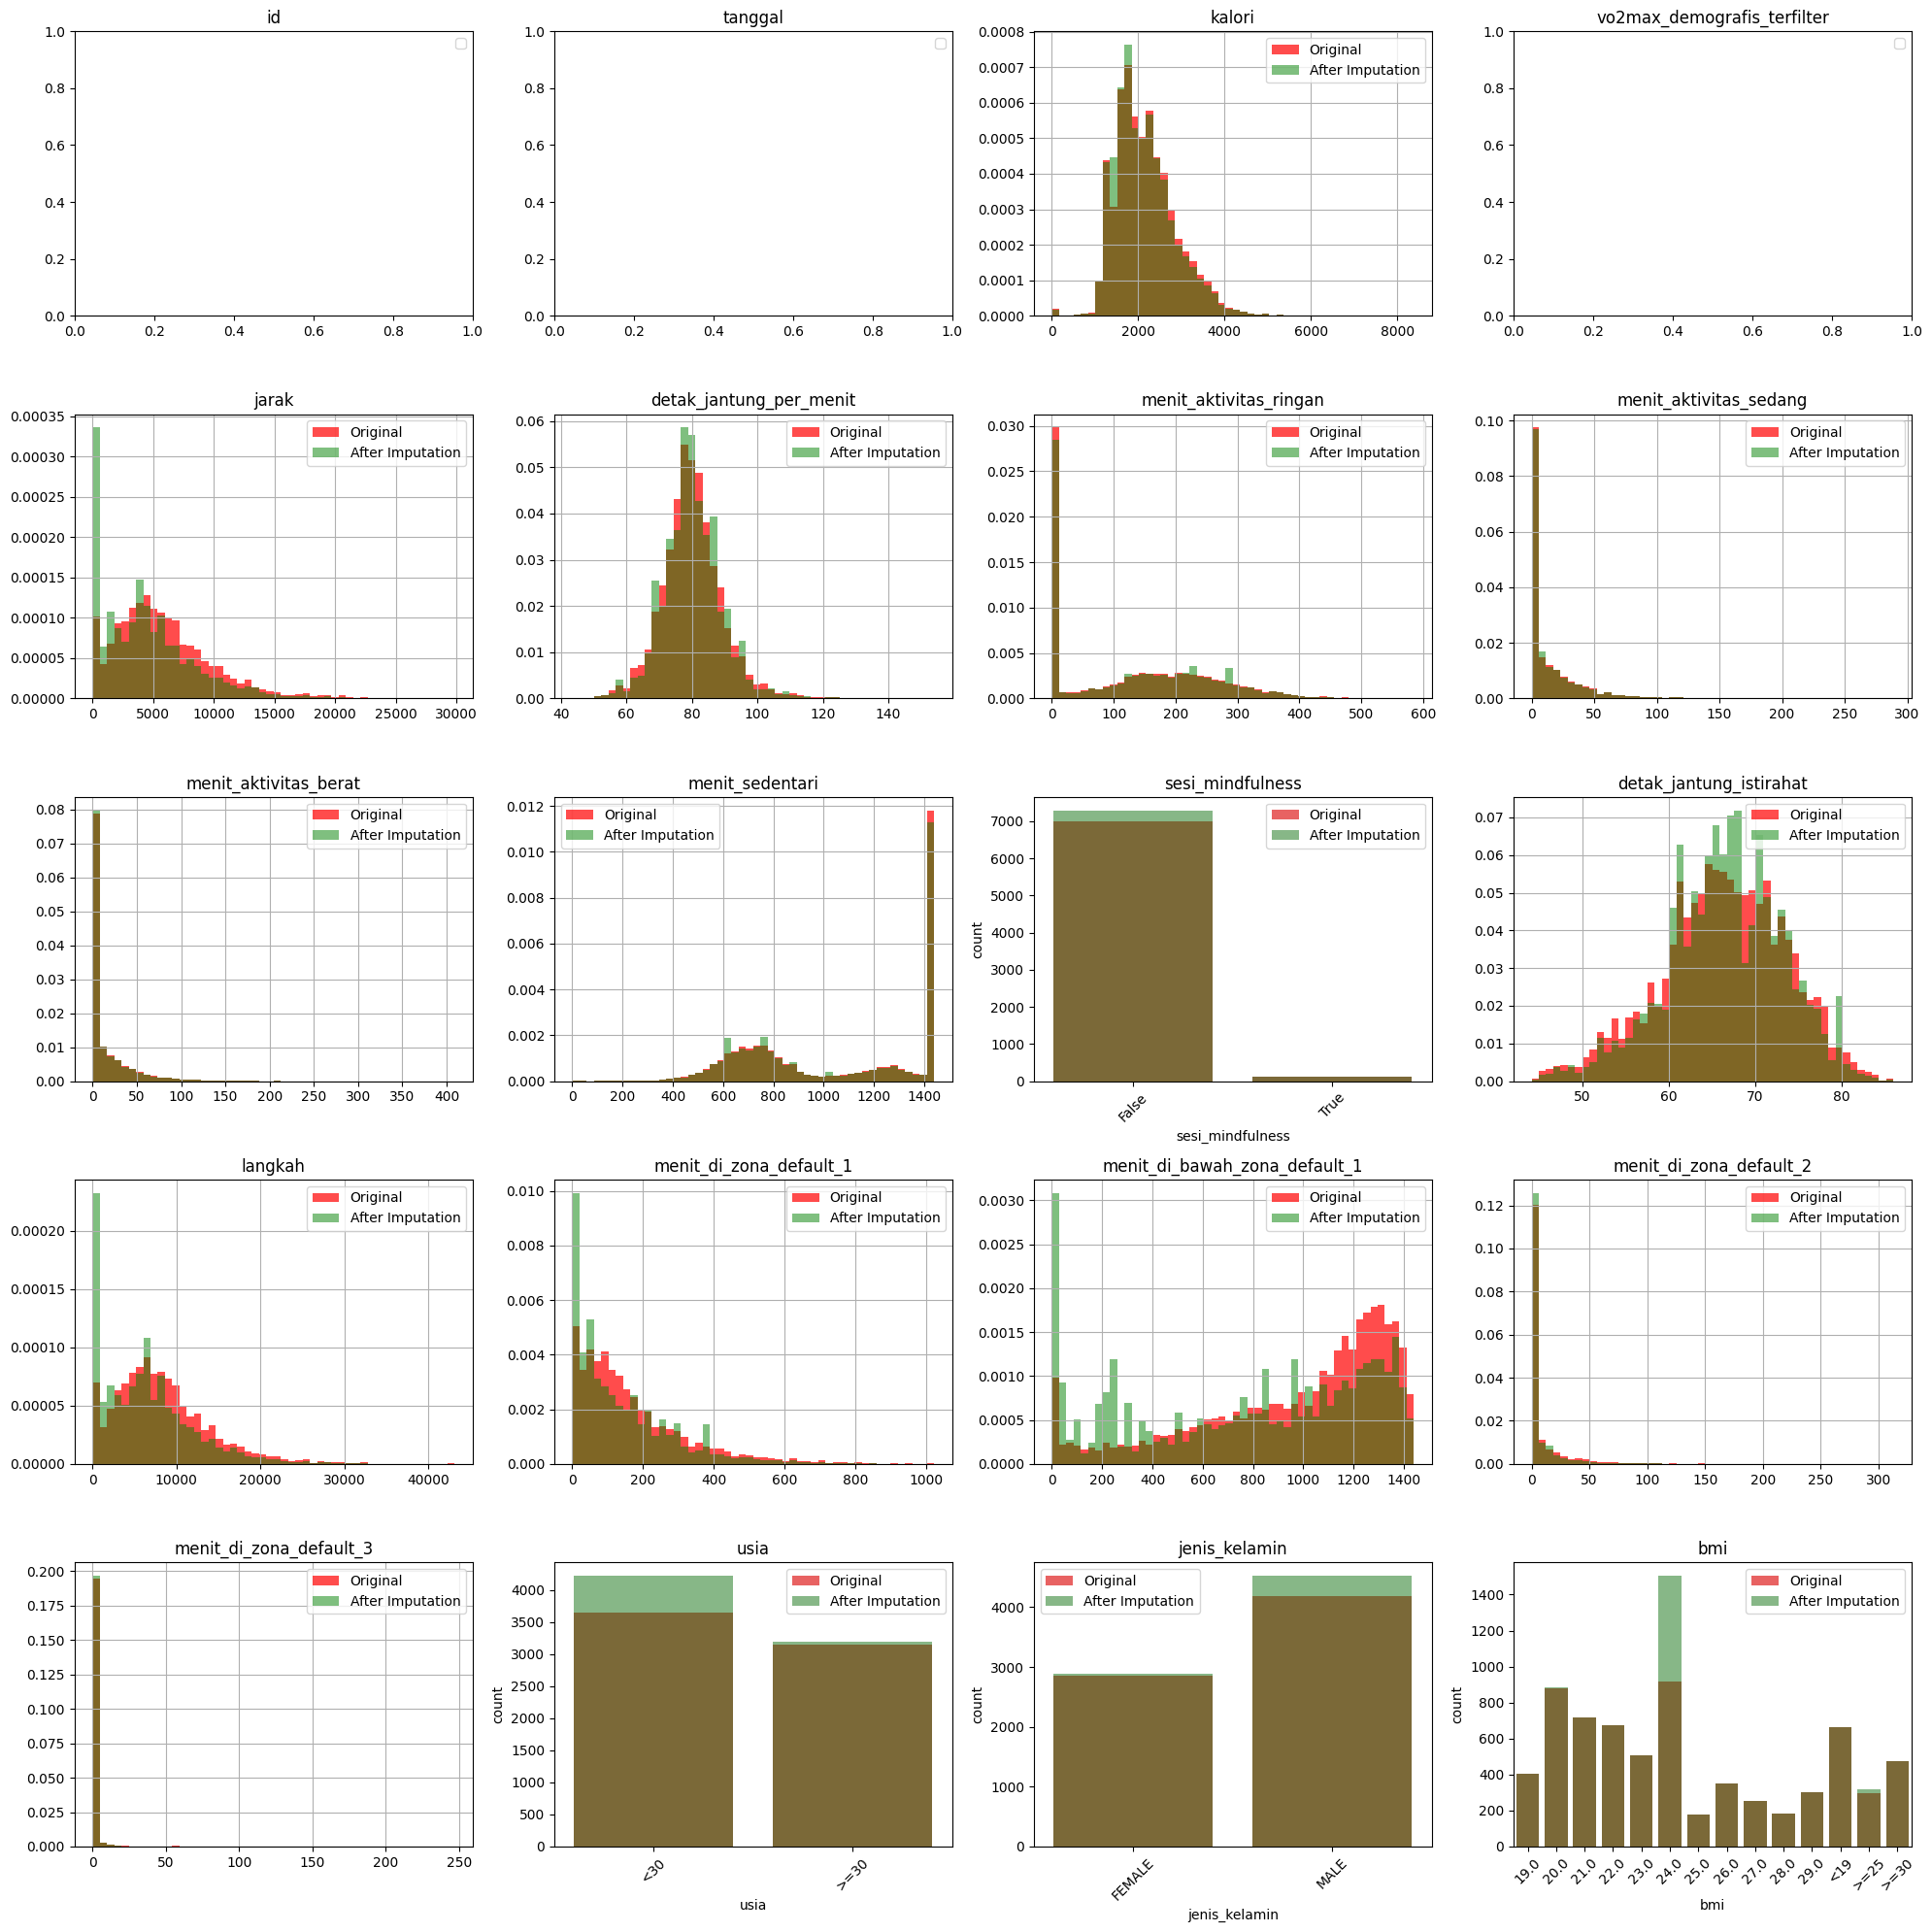

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dat
df = df2
# Standardisasi nama kolom ke lowercase tanpa spasi
df.columns = df.columns.str.strip().str.lower()
df3.columns = df3.columns.str.strip().str.lower()


# Ambil kolom yang ada di kedua DataFrame
columns = [col for col in df.columns if col in df3.columns]

# Debug: cek kolom yang akan divisualisasikan
print("Total kolom yang akan divisualisasi:", len(columns))
print(columns)

# Plot
n_cols = 4
n_rows = int(np.ceil(len(columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]

    if col in kolom_numerik:
        # Plot histogram numerik
        df[col].dropna().hist(bins=50, ax=ax, density=True, color='red', alpha=0.7, label='Original')
        df3[col].dropna().hist(bins=50, ax=ax, density=True, color='green', alpha=0.5, label='After Imputation')

    elif col in kolom_kategorikal:
        # Plot countplot kategorikal
        sns.countplot(data=df, x=col, color='red', alpha=0.7, label='Original', ax=ax)
        sns.countplot(data=df3, x=col, color='green', alpha=0.5, label='After Imputation', ax=ax)
        ax.tick_params(axis='x', rotation=45)

    ax.set_title(col)
    ax.legend()

# Hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# **3. Handling Outlier**

In [ ]:
df3.isna().sum()

,0
id,0
tanggal,0
id,0
kalori,0
vo2max_demografis_terfilter,0
jarak,0
detak_jantung_per_menit,0
menit_aktivitas_ringan,0
menit_aktivitas_sedang,0
menit_aktivitas_berat,0


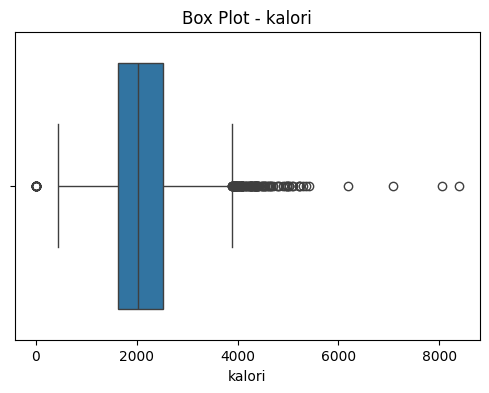

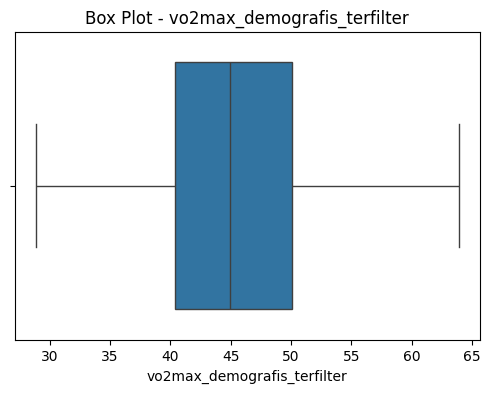

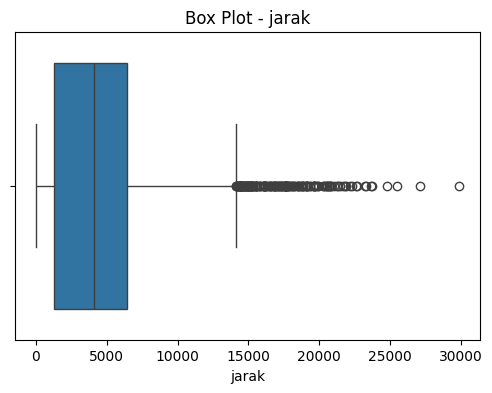

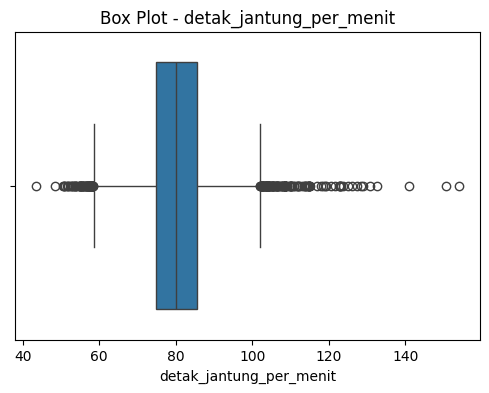

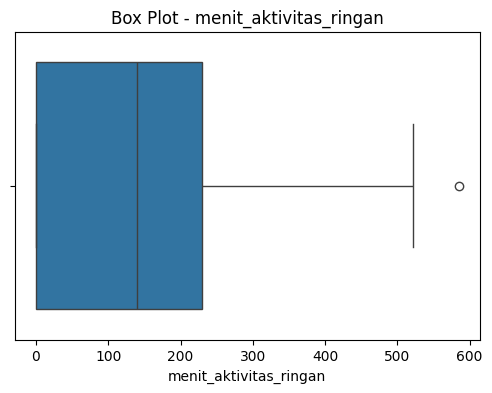

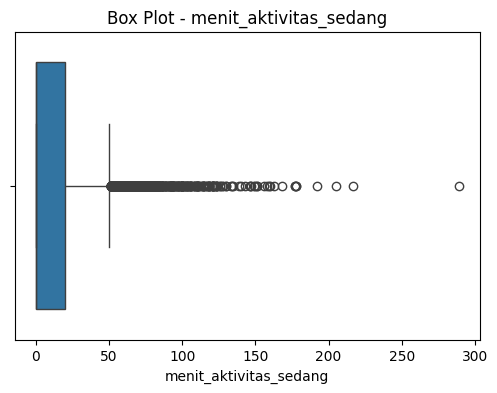

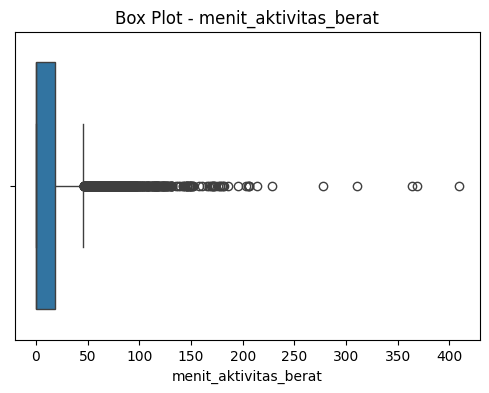

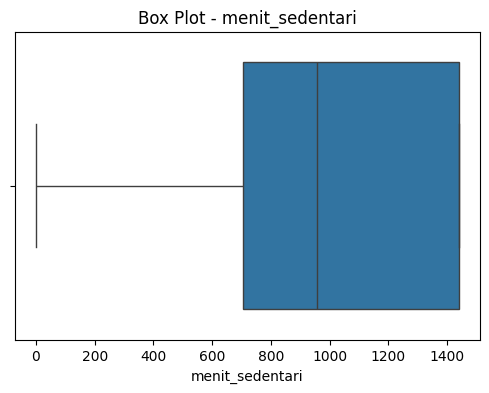

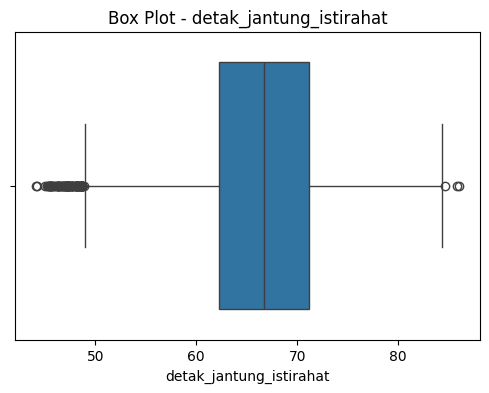

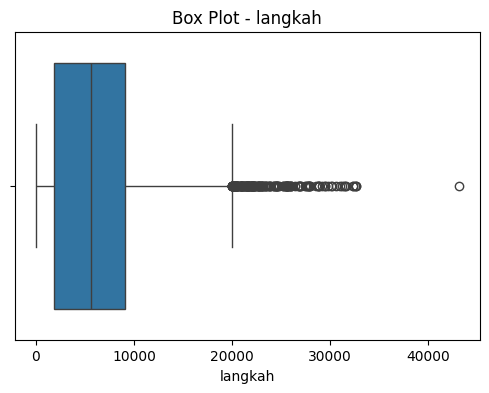

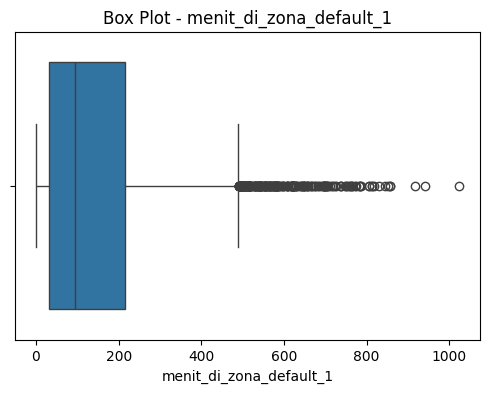

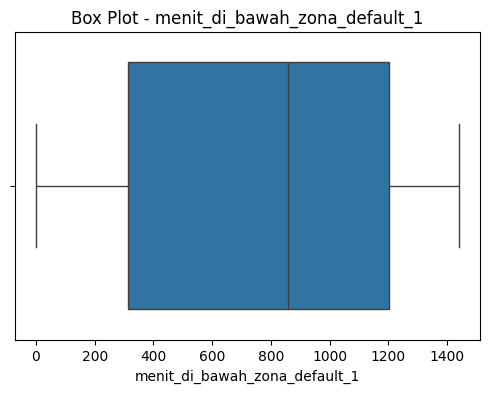

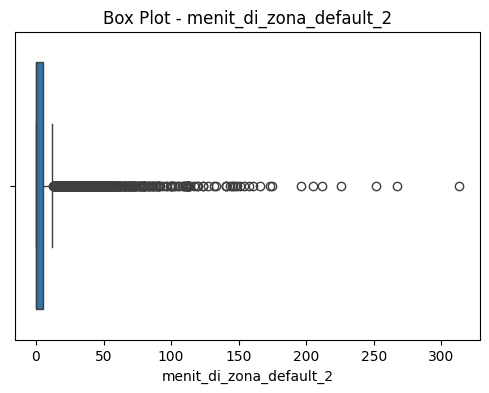

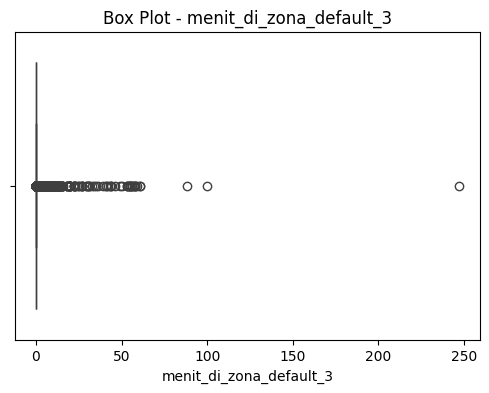

In [ ]:


# Memilih hanya kolom numerik
numerik_handling_outlier = df3.select_dtypes(include=['float64', 'int64'])

# Menampilkan box plot untuk setiap kolom numerik
for column in numerik_handling_outlier.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=numerik_handling_outlier[column])
    plt.title(f"Box Plot - {column}")
    plt.show()


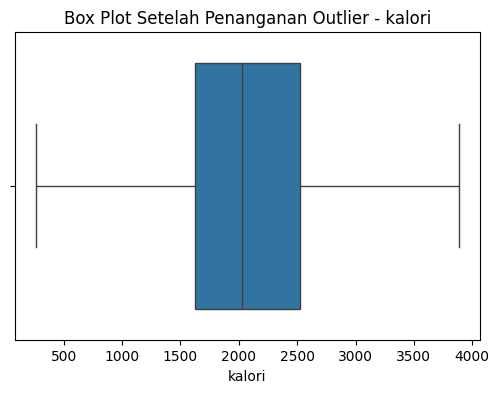

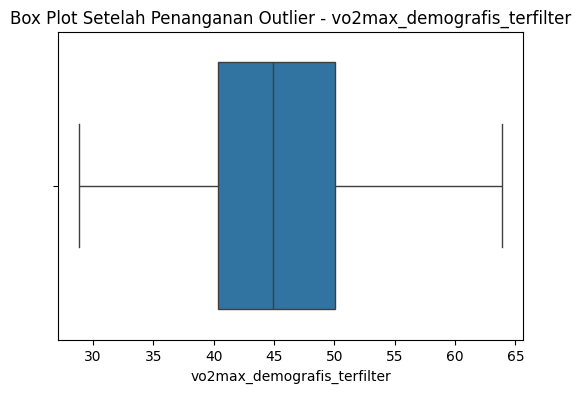

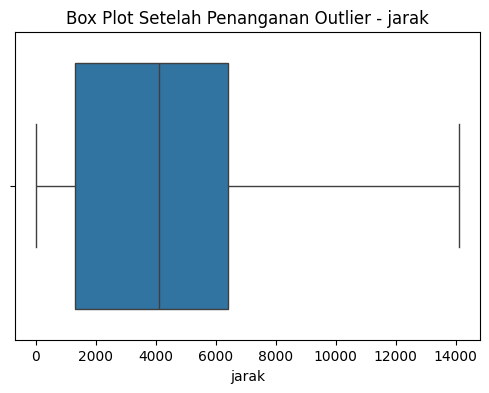

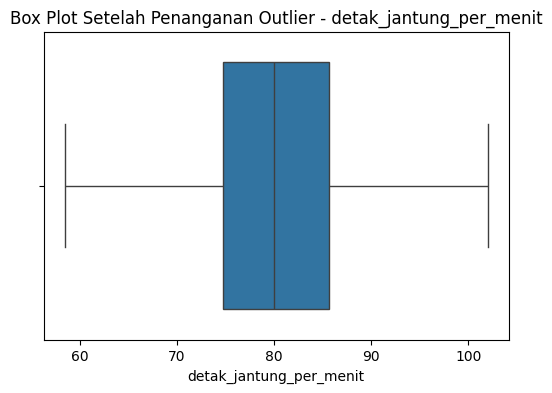

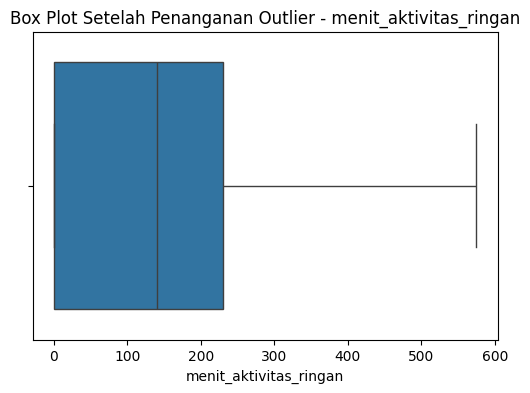

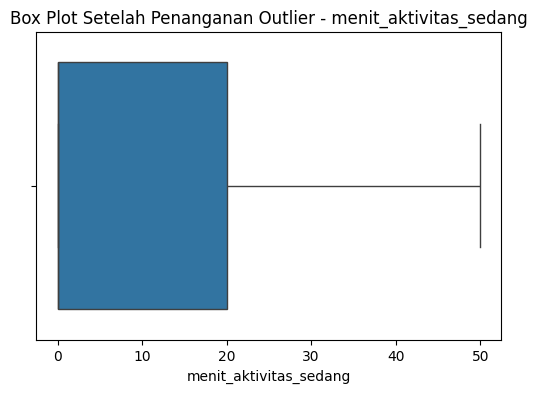

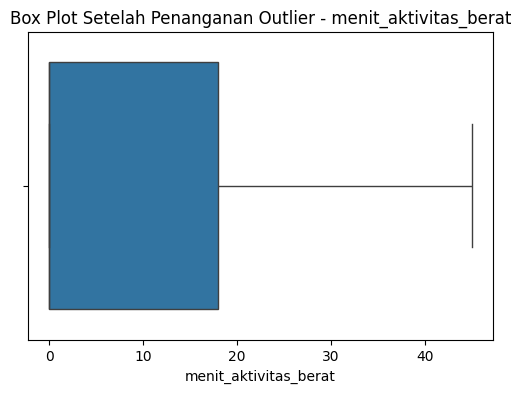

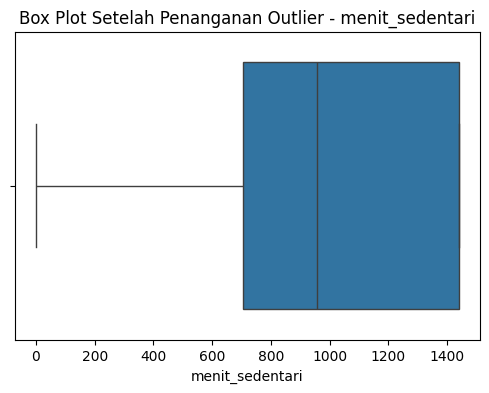

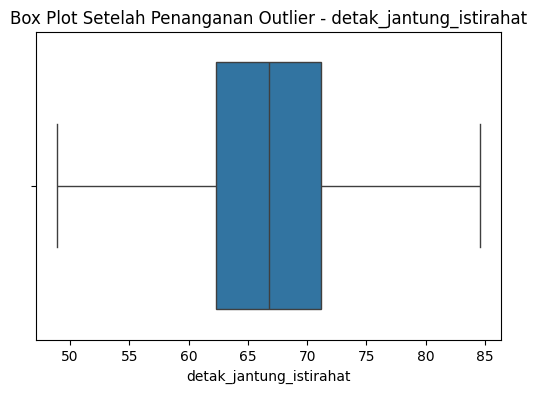

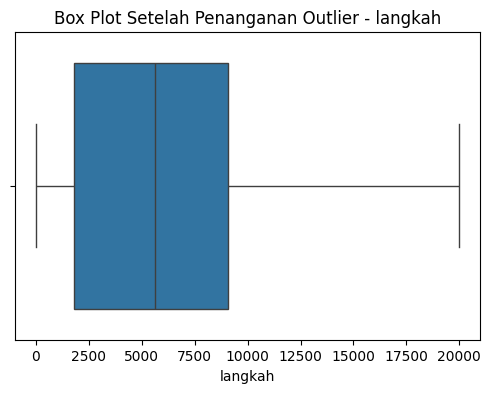

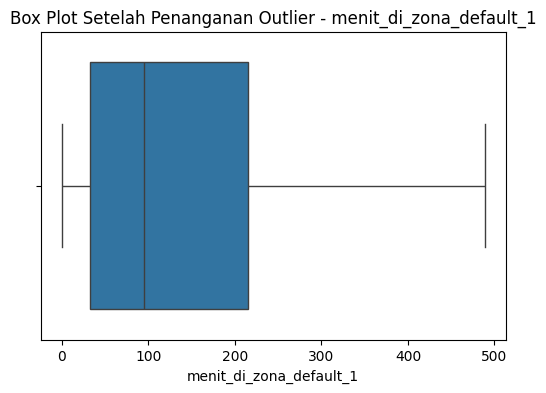

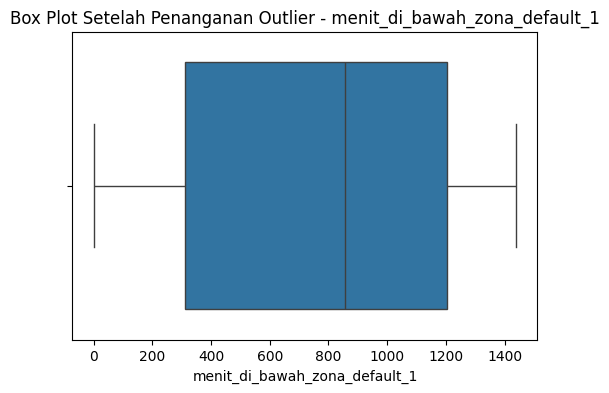

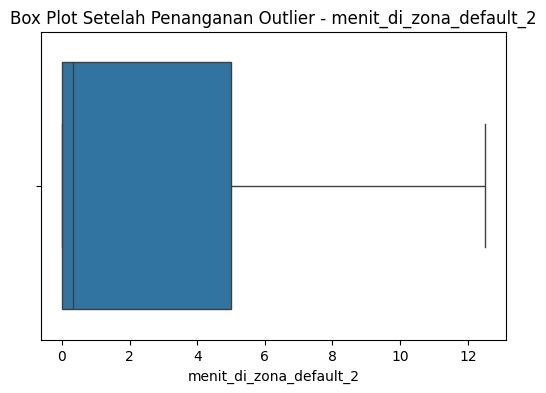

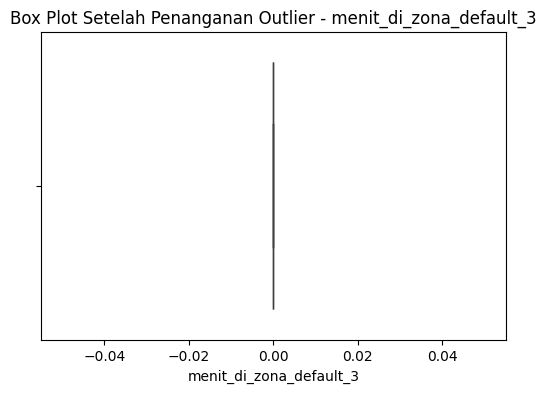

In [ ]:
# Menangani outlier menggunakan metode IQR
for column in numerik_handling_outlier.columns:
    Q1 = numerik_handling_outlier[column].quantile(0.25)
    Q3 = numerik_handling_outlier[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menangani outlier dengan mengganti nilai di luar batas dengan batas tersebut
    numerik_handling_outlier[column] = numerik_handling_outlier[column].apply(
        lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x)
    )

# Menampilkan box plot setelah penanganan outlier
for column in numerik_handling_outlier.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=numerik_handling_outlier[column])
    plt.title(f"Box Plot Setelah Penanganan Outlier - {column}")
    plt.show()

In [ ]:
# Pastikan semua dataframe memiliki index yang sejajar

df_final = pd.concat(
    [df2[['id', 'tanggal']].reset_index(drop=True),
     numerik_handling_outlier.reset_index(drop=True),
     df_kategorikal_cleaned.reset_index(drop=True)],
    axis=1
)


In [ ]:
df_final.dtypes

,0
id,object
tanggal,datetime64[ns]
kalori,float64
vo2max_demografis_terfilter,float64
jarak,float64
detak_jantung_per_menit,float64
menit_aktivitas_ringan,float64
menit_aktivitas_sedang,float64
menit_aktivitas_berat,float64
menit_sedentari,float64


In [ ]:
len(df_final.columns)

20

In [ ]:
df_final

,id,tanggal,kalori,vo2max_demografis_terfilter,jarak,detak_jantung_per_menit,menit_aktivitas_ringan,menit_aktivitas_sedang,menit_aktivitas_berat,menit_sedentari,detak_jantung_istirahat,langkah,menit_di_zona_default_1,menit_di_bawah_zona_default_1,menit_di_zona_default_2,menit_di_zona_default_3,sesi_mindfulness,usia,jenis_kelamin,bmi
0,621e2e8e67b776a24055b564,2021-05-24,2351.59,62.792100,6517.500000,71.701565,149.0,24.0,33.0,713.0,62.073070,8833.000000,83.000000,1349.000000,0.0,0.0,False,<30,MALE,<19
1,621e2e8e67b776a24055b564,2021-05-25,2332.08,62.679120,7178.600000,70.579300,132.0,25.0,31.0,704.0,62.121476,9727.000000,56.000000,1374.000000,4.0,0.0,False,<30,MALE,<19
2,621e2e8e67b776a24055b564,2021-05-26,2262.30,62.573070,6090.900000,71.842573,112.0,27.0,31.0,710.0,62.263999,8253.000000,85.000000,1350.000000,0.0,0.0,False,<30,MALE,<19
3,621e2e8e67b776a24055b564,2021-05-27,2325.10,62.474930,6653.100000,71.725477,133.0,21.0,37.0,622.0,62.368900,9015.000000,90.000000,1282.000000,0.0,0.0,False,<30,MALE,<19
4,621e2e8e67b776a24055b564,2021-05-28,2586.76,62.411660,9557.900000,74.401028,136.0,42.0,45.0,647.0,61.965409,12949.000000,146.000000,1274.000000,4.0,0.0,False,<30,MALE,<19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,621e362467b776a2404ad513,2021-05-18,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,73.900895,3678.000000,78.666667,558.666667,0.0,0.0,False,>=30,MALE,24.0
7406,621e36f967b776a240e5e7c9,2021-05-20,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,73.900895,3678.000000,78.666667,558.666667,0.0,0.0,False,<30,FEMALE,>=25
7407,621e362467b776a2404ad513,2021-05-23,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,73.900895,3678.000000,78.666667,558.666667,0.0,0.0,False,>=30,MALE,24.0
7408,621e339967b776a240e502de,2021-11-19,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,73.900895,3678.000000,78.666667,558.666667,0.0,0.0,False,<30,FEMALE,20.0


In [ ]:
import pandas as pd

unique_ids = pd.Series(df['id'].unique())
id_mapping = {id_val: f'pengguna {i+1}' for i, id_val in enumerate(unique_ids)}

df_final['id'] = df['id'].map(id_mapping)

df_final.rename(columns={'id': 'Pengguna'}, inplace=True)
df_final


,Pengguna,tanggal,kalori,vo2max_demografis_terfilter,jarak,detak_jantung_per_menit,menit_aktivitas_ringan,menit_aktivitas_sedang,menit_aktivitas_berat,menit_sedentari,detak_jantung_istirahat,langkah,menit_di_zona_default_1,menit_di_bawah_zona_default_1,menit_di_zona_default_2,menit_di_zona_default_3,sesi_mindfulness,usia,jenis_kelamin,bmi
0,pengguna 1,2021-05-24,2351.59,62.792100,6517.500000,71.701565,149.0,24.0,33.0,713.0,62.073070,8833.000000,83.000000,1349.000000,0.0,0.0,False,<30,MALE,<19
1,pengguna 1,2021-05-25,2332.08,62.679120,7178.600000,70.579300,132.0,25.0,31.0,704.0,62.121476,9727.000000,56.000000,1374.000000,4.0,0.0,False,<30,MALE,<19
2,pengguna 1,2021-05-26,2262.30,62.573070,6090.900000,71.842573,112.0,27.0,31.0,710.0,62.263999,8253.000000,85.000000,1350.000000,0.0,0.0,False,<30,MALE,<19
3,pengguna 1,2021-05-27,2325.10,62.474930,6653.100000,71.725477,133.0,21.0,37.0,622.0,62.368900,9015.000000,90.000000,1282.000000,0.0,0.0,False,<30,MALE,<19
4,pengguna 1,2021-05-28,2586.76,62.411660,9557.900000,74.401028,136.0,42.0,45.0,647.0,61.965409,12949.000000,146.000000,1274.000000,4.0,0.0,False,<30,MALE,<19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,pengguna 63,2021-05-18,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,73.900895,3678.000000,78.666667,558.666667,0.0,0.0,False,>=30,MALE,24.0
7406,pengguna 69,2021-05-20,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,73.900895,3678.000000,78.666667,558.666667,0.0,0.0,False,<30,FEMALE,>=25
7407,pengguna 63,2021-05-23,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,73.900895,3678.000000,78.666667,558.666667,0.0,0.0,False,>=30,MALE,24.0
7408,pengguna 45,2021-11-19,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,73.900895,3678.000000,78.666667,558.666667,0.0,0.0,False,<30,FEMALE,20.0


## SPM

In [ ]:
!pip install prefixspan

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11215 sha256=f9a1d678c9115528509d952a23cddd51bde6247bcb2f3536bf176e524f73b57e
  Stored in directory: /root/.cache/pip/wheels/95/1a/4a/d02ca86ccf55a25e07bd200a5320b8a584e5e2b75b1168f703
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e77ffbfd33c112f4afcb7cac04c2c93cfdb1ab7bdd193f0040ad98cf67965d72
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28865 sha256=6f8fced07994ebab05c4ca9f19b2491c392315633cf9ee615de23d90c32a3ecf
  Stored in directory: /root/.cache/pip/wheels/a8/79/68/6f2edcddbadb15fdcff02e0748a05579d52e78185a4546ab4b
Successfully built prefixspan docopt extratools


In [ ]:
from collections import defaultdict
from prefixspan import PrefixSpan
from sklearn.preprocessing import KBinsDiscretizer

# Diskretisasi fitur
df = df_final.copy()
features = ['kalori', 'langkah', 'menit_sedentari', 'detak_jantung_istirahat']
disc_labels = ['rendah', 'medium', 'tinggi']

for feature in features:
    est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    df[feature + '_disc'] = est.fit_transform(df[[feature]]).astype(int)
    df[feature + '_disc'] = df[feature + '_disc'].apply(lambda x: f"{feature}_{disc_labels[x]}")

# Buat urutan itemset per user
df = df.sort_values(by=['Pengguna', 'tanggal'])
user_sequences = defaultdict(list)

for _, row in df.iterrows():
    itemset = [row[feature + '_disc'] for feature in features]
    user_sequences[row['Pengguna']].append(itemset)

# Jalankan PrefixSpan untuk tiap user
results = {}
for user_id, sequence in user_sequences.items():
    ps = PrefixSpan(sequence)
    patterns = ps.topk(10)
    results[user_id] = patterns

# Cetak hasil dengan nama pengguna-1, pengguna-2, dst.
for idx, (user_id, patterns) in enumerate(results.items(), start=1):
    print(f"\nTop 10 Frequent Patterns for Pengguna-{idx}")
    print("-" * 60)
    for i, (support, pattern) in enumerate(patterns, start=1):
        pattern_str = " → ".join(pattern)
        print(f"{i:2}. Support: {support:3} | Pattern: {pattern_str}")



Top 10 Frequent Patterns for Pengguna-1
------------------------------------------------------------
 1. Support:  71 | Pattern: detak_jantung_istirahat_rendah
 2. Support:  59 | Pattern: langkah_tinggi
 3. Support:  59 | Pattern: langkah_tinggi → detak_jantung_istirahat_rendah
 4. Support:  57 | Pattern: menit_sedentari_rendah
 5. Support:  57 | Pattern: menit_sedentari_rendah → detak_jantung_istirahat_rendah
 6. Support:  50 | Pattern: langkah_tinggi → menit_sedentari_rendah
 7. Support:  50 | Pattern: langkah_tinggi → menit_sedentari_rendah → detak_jantung_istirahat_rendah
 8. Support:  41 | Pattern: kalori_tinggi
 9. Support:  41 | Pattern: kalori_tinggi → langkah_tinggi
10. Support:  41 | Pattern: kalori_tinggi → langkah_tinggi → detak_jantung_istirahat_rendah

Top 10 Frequent Patterns for Pengguna-2
------------------------------------------------------------
 1. Support:  85 | Pattern: detak_jantung_istirahat_rendah
 2. Support:  45 | Pattern: kalori_tinggi
 3. Support:  45 | P

In [ ]:
from collections import defaultdict
from prefixspan import PrefixSpan
from sklearn.preprocessing import KBinsDiscretizer

features = ['kalori', 'langkah', 'menit_sedentari', 'detak_jantung_istirahat']
disc_labels = ['rendah', 'medium', 'tinggi']

for feature in features:
    est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    df[feature + '_disc'] = est.fit_transform(df[[feature]]).astype(int)
    df[feature + '_disc'] = df[feature + '_disc'].apply(lambda x: f"{feature}_{disc_labels[x]}")

# === 2. Buat Urutan Itemset per Pengguna ===
df = df.sort_values(by=['Pengguna', 'tanggal'])
user_sequences = defaultdict(list)

for _, row in df.iterrows():
    itemset = [row[feature + '_disc'] for feature in features]
    user_sequences[row['Pengguna']].append(itemset)

# === 3. Jalankan PrefixSpan untuk Tiap Pengguna ===
results = {}
for user_id, sequence in user_sequences.items():
    ps = PrefixSpan(sequence)
    patterns = ps.topk(10)
    results[user_id] = patterns

# === 4. Fungsi Segmentasi Berdasarkan Pola ===
def classify_segment_from_patterns(patterns):
    segment_score = {
        "Aktif & Sehat": 0,
        "Kurang Gerak": 0,
        "Stres / Kurang Istirahat": 0
    }

    for support, pattern in patterns:
        for item in pattern:
            if "langkah_tinggi" in item:
                segment_score["Aktif & Sehat"] += 1
            if "kalori_tinggi" in item:
                segment_score["Aktif & Sehat"] += 1
            if "menit_sedentari_rendah" in item:
                segment_score["Aktif & Sehat"] += 1

            if "langkah_rendah" in item:
                segment_score["Kurang Gerak"] += 1
            if "menit_sedentari_tinggi" in item:
                segment_score["Kurang Gerak"] += 1

            if "detak_jantung_istirahat_tinggi" in item:
                segment_score["Stres / Kurang Istirahat"] += 1
            if "kalori_rendah" in item:
                segment_score["Stres / Kurang Istirahat"] += 1

    dominant_segment = max(segment_score, key=segment_score.get)
    return dominant_segment, segment_score

# === 5. Cetak Hasil Pola dan Segmentasi ===
print("\nHasil Pola Frekuen dan Segmentasi Tiap Pengguna:\n")

user_mapping = {uid: f"pengguna-{i+1}" for i, uid in enumerate(results.keys())}

for i, (user_id, patterns) in enumerate(results.items(), start=1):
    nama_pengguna = user_mapping[user_id]

    print(f"\nTop 10 Frequent Patterns for {nama_pengguna}")
    print("-" * 60)
    for j, (support, pattern) in enumerate(patterns, start=1):
        pattern_str = " → ".join(pattern)
        print(f"{j:2}. Support: {support:3} | Pattern: {pattern_str}")

    # Segmentasi pengguna
    segment, scores = classify_segment_from_patterns(patterns)
    print(f"\nSegmentasi {nama_pengguna}")
    print(f"Segment : {segment}")
    print(f"Score   : {scores}")
    print("=" * 60)



Hasil Pola Frekuen dan Segmentasi Tiap Pengguna:


Top 10 Frequent Patterns for pengguna-1
------------------------------------------------------------
 1. Support:  71 | Pattern: detak_jantung_istirahat_rendah
 2. Support:  59 | Pattern: langkah_tinggi
 3. Support:  59 | Pattern: langkah_tinggi → detak_jantung_istirahat_rendah
 4. Support:  57 | Pattern: menit_sedentari_rendah
 5. Support:  57 | Pattern: menit_sedentari_rendah → detak_jantung_istirahat_rendah
 6. Support:  50 | Pattern: langkah_tinggi → menit_sedentari_rendah
 7. Support:  50 | Pattern: langkah_tinggi → menit_sedentari_rendah → detak_jantung_istirahat_rendah
 8. Support:  41 | Pattern: kalori_tinggi
 9. Support:  41 | Pattern: kalori_tinggi → langkah_tinggi
10. Support:  41 | Pattern: kalori_tinggi → langkah_tinggi → detak_jantung_istirahat_rendah

Segmentasi pengguna-1
Segment : Aktif & Sehat
Score   : {'Aktif & Sehat': 13, 'Kurang Gerak': 0, 'Stres / Kurang Istirahat': 0}

Top 10 Frequent Patterns for pengguna-2
--

In [ ]:
print("\nSegmentasi Pengguna Berdasarkan Pola Aktivitas:\n")

for i, (user_id, patterns) in enumerate(results.items(), start=1):
    nama_pengguna = user_mapping[user_id]
    segment, scores = classify_segment_from_patterns(patterns)

    print(f"{nama_pengguna}")
    print(f"Segment : {segment}")


Segmentasi Pengguna Berdasarkan Pola Aktivitas:

pengguna-1
Segment : Aktif & Sehat
pengguna-2
Segment : Aktif & Sehat
pengguna-3
Segment : Aktif & Sehat
pengguna-4
Segment : Aktif & Sehat
pengguna-5
Segment : Aktif & Sehat
pengguna-6
Segment : Aktif & Sehat
pengguna-7
Segment : Kurang Gerak
pengguna-8
Segment : Aktif & Sehat
pengguna-9
Segment : Kurang Gerak
pengguna-10
Segment : Kurang Gerak
pengguna-11
Segment : Aktif & Sehat
pengguna-12
Segment : Aktif & Sehat
pengguna-13
Segment : Aktif & Sehat
pengguna-14
Segment : Aktif & Sehat
pengguna-15
Segment : Stres / Kurang Istirahat
pengguna-16
Segment : Kurang Gerak
pengguna-17
Segment : Aktif & Sehat
pengguna-18
Segment : Stres / Kurang Istirahat
pengguna-19
Segment : Aktif & Sehat
pengguna-20
Segment : Aktif & Sehat
pengguna-21
Segment : Aktif & Sehat
pengguna-22
Segment : Aktif & Sehat
pengguna-23
Segment : Stres / Kurang Istirahat
pengguna-24
Segment : Stres / Kurang Istirahat
pengguna-25
Segment : Aktif & Sehat
pengguna-26
Segment

In [ ]:
import pandas as pd
segmentasi_data = []

for i, (user_id, patterns) in enumerate(results.items(), start=1):
    nama_pengguna = user_mapping[user_id]
    segment, scores = classify_segment_from_patterns(patterns)

    segmentasi_data.append({
        "Pengguna": nama_pengguna,
        "Segment": segment,
        "Skor Aktif & Sehat": scores["Aktif & Sehat"],
        "Skor Kurang Gerak": scores["Kurang Gerak"],
        "Skor Stres / Kurang Istirahat": scores["Stres / Kurang Istirahat"]
    })


df_segmentasi = pd.DataFrame(segmentasi_data)
df_segmentasi


,Pengguna,Segment,Skor Aktif & Sehat,Skor Kurang Gerak,Skor Stres / Kurang Istirahat
0,pengguna-1,Aktif & Sehat,13,0,0
1,pengguna-2,Aktif & Sehat,8,0,0
2,pengguna-3,Aktif & Sehat,0,0,0
3,pengguna-4,Aktif & Sehat,4,0,0
4,pengguna-5,Aktif & Sehat,8,0,6
...,...,...,...,...,...
66,pengguna-67,Aktif & Sehat,0,0,0
67,pengguna-68,Aktif & Sehat,4,2,4
68,pengguna-69,Aktif & Sehat,8,0,4
69,pengguna-70,Kurang Gerak,0,9,6


In [ ]:
df_segmentasi.nunique()

,0
Pengguna,71
Segment,3
Skor Aktif & Sehat,15
Skor Kurang Gerak,11
Skor Stres / Kurang Istirahat,13


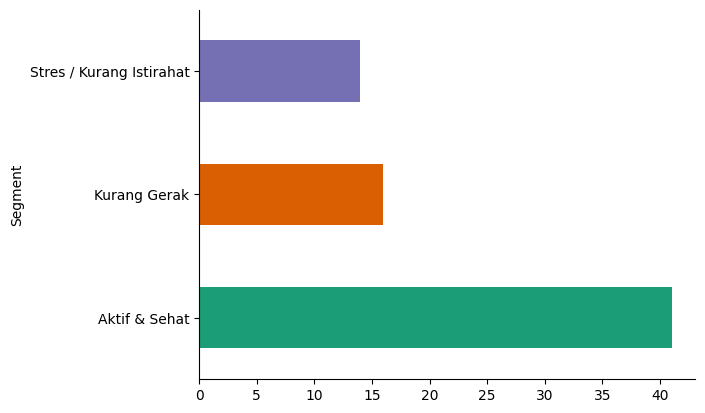

In [ ]:
# @title Segment

from matplotlib import pyplot as plt
import seaborn as sns
df_segmentasi.groupby('Segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

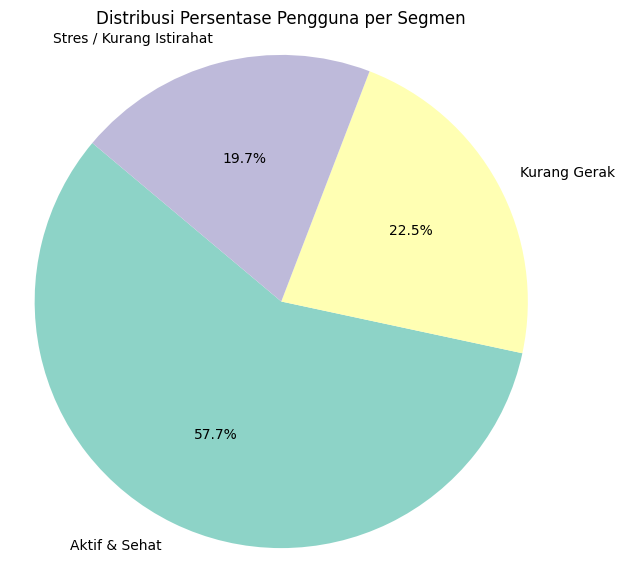

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah pengguna per segmen
segment_counts = df_segmentasi['Segment'].value_counts()

# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Distribusi Persentase Pengguna per Segmen")
plt.axis('equal')  # Agar bentuk pie-nya bulat sempurna
plt.show()


In [ ]:
df_final.nunique()

,0
Pengguna,71
tanggal,283
kalori,4565
vo2max_demografis_terfilter,4920
jarak,4502
detak_jantung_per_menit,4826
menit_aktivitas_ringan,465
menit_aktivitas_sedang,62
menit_aktivitas_berat,54
menit_sedentari,1020


In [ ]:
import pandas as pd

# Data yang diberikan dalam bentuk list
data = [
    ("Aktif & Sehat", ["pengguna-1", "pengguna-2", "pengguna-6", "pengguna-7", "pengguna-9", "pengguna-10", "pengguna-11", "pengguna-12", "pengguna-13", "pengguna-14", "pengguna-16", "pengguna-19", "pengguna-20", "pengguna-21", "pengguna-24", "pengguna-26", "pengguna-27", "pengguna-28", "pengguna-29", "pengguna-31", "pengguna-32", "pengguna-33", "pengguna-34", "pengguna-35", "pengguna-42", "pengguna-44", "pengguna-45", "pengguna-46", "pengguna-47", "pengguna-48", "pengguna-49", "pengguna-50", "pengguna-51", "pengguna-59", "pengguna-60", "pengguna-61", "pengguna-64", "pengguna-67", "pengguna-69", "pengguna-70", "pengguna-71"]),
    ("Stres / Kurang Istirahat", ["pengguna-3", "pengguna-5", "pengguna-22", "pengguna-25", "pengguna-30", "pengguna-38", "pengguna-39", "pengguna-41", "pengguna-43", "pengguna-53", "pengguna-54", "pengguna-55", "pengguna-58", "pengguna-63"]),
    ("Kurang Gerak", ["pengguna-4", "pengguna-8", "pengguna-15", "pengguna-17", "pengguna-18", "pengguna-23", "pengguna-36", "pengguna-37", "pengguna-40", "pengguna-52", "pengguna-56", "pengguna-57", "pengguna-62", "pengguna-65", "pengguna-66", "pengguna-68"]),
]



#hubungan bmi, jenis kelamin, usia dengan segmentasi pola hidup pengguna menggunakan chi-square test dan cramers test

In [ ]:
df_segmentasi['Pengguna'] = df_segmentasi['Pengguna'].str.replace('-', ' ')
df_final['Pengguna'] = df_final['Pengguna'].str.strip()

# 3. Gabungkan df_segmentasi dengan data demografis
df_chisquare = pd.merge(
    df_segmentasi[['Pengguna', 'Segment']],
    df_final[['Pengguna','usia', 'jenis_kelamin','bmi']],
    on='Pengguna',
    how='left'
)
df_chisquare


,Pengguna,Segment,usia,jenis_kelamin,bmi
0,pengguna 1,Aktif & Sehat,<30,MALE,<19
1,pengguna 1,Aktif & Sehat,<30,MALE,<19
2,pengguna 1,Aktif & Sehat,<30,MALE,<19
3,pengguna 1,Aktif & Sehat,<30,MALE,<19
4,pengguna 1,Aktif & Sehat,<30,MALE,<19
...,...,...,...,...,...
7405,pengguna 71,Aktif & Sehat,<30,FEMALE,23.0
7406,pengguna 71,Aktif & Sehat,<30,FEMALE,23.0
7407,pengguna 71,Aktif & Sehat,<30,FEMALE,23.0
7408,pengguna 71,Aktif & Sehat,<30,FEMALE,23.0


In [ ]:
df_chisquare.drop_duplicates()

,Pengguna,Segment,usia,jenis_kelamin,bmi
0,pengguna 1,Aktif & Sehat,<30,MALE,<19
71,pengguna 2,Aktif & Sehat,>=30,FEMALE,<19
159,pengguna 3,Aktif & Sehat,<30,FEMALE,23.0
273,pengguna 4,Aktif & Sehat,<30,MALE,28.0
373,pengguna 5,Aktif & Sehat,<30,FEMALE,21.0
...,...,...,...,...,...
6922,pengguna 67,Aktif & Sehat,<30,MALE,20.0
7010,pengguna 68,Aktif & Sehat,>=30,MALE,24.0
7143,pengguna 69,Aktif & Sehat,<30,FEMALE,>=25
7241,pengguna 70,Kurang Gerak,<30,MALE,28.0


H₀ : Tidak ada hubungan antara fitur usia, bmi, dan jenis kelamin terhadap segmentasi gaya hidup

H₁ : Ada hubungan antara fitur usia, bmi, dan jenis kelamin terhadap segmentasi gaya hidup

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

table_usia = pd.crosstab(df_chisquare['usia'], df_chisquare['Segment'])
table_jenis_kelamin = pd.crosstab(df_chisquare['jenis_kelamin'], df_chisquare['Segment'])
table_bmi = pd.crosstab(df_chisquare['bmi'], df_chisquare['Segment'])


_, p_usia, _, _ = chi2_contingency(table_usia)
_, p_gender, _, _ = chi2_contingency(table_jenis_kelamin)
_, p_bmi, _, _ = chi2_contingency(table_bmi)

print(f"p-value usia vs Segment = {p_usia}")
print(f"p-value jenis_kelamin vs Segment = {p_gender}")
print(f"p-value bmi vs Segment = {p_bmi}")


p-value usia vs Segment = 1.929771860908078e-24
p-value jenis_kelamin vs Segment = 1.5378558128180795e-147
p-value bmi vs Segment = 0.0


* Jika p-value < 0.05, maka hubungan antara dua variabel signifikan secara statistik.

* Dalam kasus ini, semua variabel memiliki p-value sangat kecil → artinya memang berkorelasi erat dengan segmentasi pengguna.




In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

def interpret_cramers_v(v):
    if v < 0.1:
        return "Sangat lemah / tidak ada hubungan"
    elif v < 0.3:
        return "Lemah"
    elif v < 0.5:
        return "Sedang"
    else:
        return "Kuat"

variables = ['usia', 'bmi', 'jenis_kelamin']

for var in variables:
    conf_matrix = pd.crosstab(df_chisquare[var], df_chisquare['Segment'])
    v = cramers_v(conf_matrix)
    print(f"Cramér's V antara {var} dan Segment: {v:.4f} -> {interpret_cramers_v(v)}")


Cramér's V antara usia dan Segment: 0.1214 -> Lemah
Cramér's V antara bmi dan Segment: 0.4456 -> Sedang
Cramér's V antara jenis_kelamin dan Segment: 0.3021 -> Sedang


# Kesimpulan Hasil Uji Chi-Square dan Cramér’s V

---

## 1. Usia vs Segment

- **p-value** nya kecil banget (~1.93e-24), ini artinya ada hubungan yang *signifikan secara statistik* antara usia sama segmentasi pengguna. Jadi, usia memang ada pengaruhnya.
- Tapi kalau dilihat dari **Cramér’s V** yang nilainya cuma 0.12 (kategori lemah), berarti pengaruh usia terhadap segment itu ada tapi gak terlalu kuat.

## 2. Jenis Kelamin vs Segment

- **p-value** juga sangat kecil (~1.54e-147), jadi jelas banget ada hubungan yang signifikan antara jenis kelamin sama segmentasi.
- Nilai **Cramér’s V** nya 0.30, masuk kategori sedang. Jadi jenis kelamin ini cukup berpengaruh buat nentuin segment pengguna.

## 3. BMI vs Segment

- **p-value** nya 0.0, yang artinya pengaruh BMI ke segment itu sangat signifikan.
- Dan nilai **Cramér’s V** 0.45, termasuk kategori sedang ke kuat, jadi BMI ini punya pengaruh yang lumayan kuat dibanding usia dan jenis kelamin.

---

# Intinya

Ketiga variabel: **usia, jenis kelamin, dan BMI** semuanya berhubungan secara signifikan sama segment pengguna.

Tapi kalau mau dibandingin dari kekuatan hubungannya, **BMI dan jenis kelamin lebih berpengaruh dibanding usia**.



#**Clustering**

In [ ]:
df_final.to_csv('df_final.csv')

In [ ]:
xy = df_final['bmi'].value_counts()
xy

,count
bmi,
24.0,1505
20.0,883
21.0,719
22.0,674
<19,663
23.0,505
>=30,476
19.0,405
26.0,348


   Jumlah Cluster  Silhouette Score
0               2          0.547698
1               3          0.393040
2               4          0.362765
3               5          0.342245
4               6          0.362814
5               7          0.366744
6               8          0.362590
7               9          0.358154
8              10          0.361549


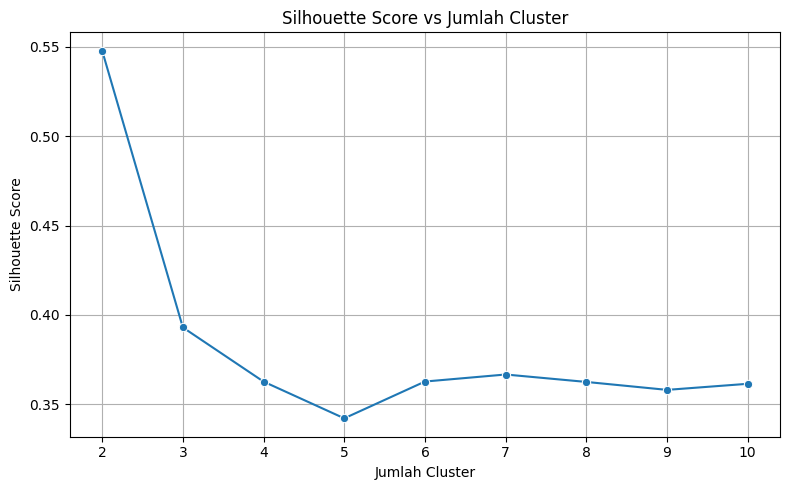

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Encoding jika diperlukan


# Fitur yang digunakan untuk clustering
features = df_final[['langkah', 'menit_aktivitas_berat','kalori']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Loop untuk berbagai jumlah cluster dan simpan silhouette score-nya
silhouette_scores = []
for k in range(2, 11):  # mencoba dari 2 hingga 10 cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append({'Jumlah Cluster': k, 'Silhouette Score': score})

# Simpan hasil ke DataFrame
df_silhouette = pd.DataFrame(silhouette_scores)

# Tampilkan hasil
print(df_silhouette)

# (Opsional) Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_silhouette, x='Jumlah Cluster', y='Silhouette Score', marker='o')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


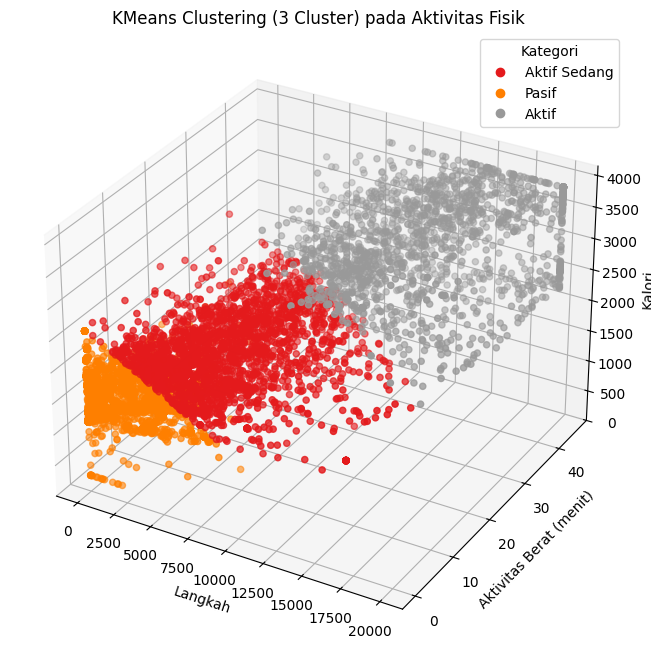

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Pastikan data tidak ada nilai negatif
df_final[['langkah', 'menit_aktivitas_berat', 'kalori']] = df_final[['langkah', 'menit_aktivitas_berat', 'kalori']].clip(lower=0)

# Fitur yang digunakan
features = ['langkah', 'menit_aktivitas_berat', 'kalori']
X = df_final[features]

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering (3 Cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
df_final['Cluster'] = kmeans.fit_predict(X_scaled)

# Hitung rata-rata tiap cluster
cluster_means = df_final.groupby('Cluster')[features].mean()

# Fungsi untuk beri label aktivitas
def assign_activity_labels(cluster_means):
    labels = {}
    for cluster in cluster_means.index:
        langkah = cluster_means.loc[cluster, 'langkah']
        aktivitas_berat = cluster_means.loc[cluster, 'menit_aktivitas_berat']
        kalori = cluster_means.loc[cluster, 'kalori']

        if langkah > cluster_means['langkah'].quantile(0.75) and kalori > cluster_means['kalori'].quantile(0.75):
            labels[cluster] = "Aktif"
        elif langkah < cluster_means['langkah'].quantile(0.25) and aktivitas_berat < cluster_means['menit_aktivitas_berat'].quantile(0.25):
            labels[cluster] = "Pasif"
        else:
            labels[cluster] = "Aktif Sedang"
    return labels

# Pemberian label kategori aktivitas
cluster_labels = assign_activity_labels(cluster_means)
df_final['Kategori Aktivitas'] = df_final['Cluster'].map(cluster_labels)

# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_final['langkah'], df_final['menit_aktivitas_berat'], df_final['kalori'], c=df_final['Cluster'], cmap='Set1')
ax.set_xlabel('Langkah')
ax.set_ylabel('Aktivitas Berat (menit)')
ax.set_zlabel('Kalori')
plt.title('KMeans Clustering (3 Cluster) pada Aktivitas Fisik')
plt.legend(handles=scatter.legend_elements()[0], labels=list(cluster_labels.values()), title="Kategori")
plt.show()


In [ ]:
df_cluster1 = df_final[['tanggal','Pengguna', 'Kategori Aktivitas']]
df_cluster1

,tanggal,Pengguna,Kategori Aktivitas
0,2021-05-24,pengguna 1,Aktif
1,2021-05-25,pengguna 1,Aktif
2,2021-05-26,pengguna 1,Aktif
3,2021-05-27,pengguna 1,Aktif
4,2021-05-28,pengguna 1,Aktif
...,...,...,...
7405,2021-05-18,pengguna 63,Pasif
7406,2021-05-20,pengguna 69,Pasif
7407,2021-05-23,pengguna 63,Pasif
7408,2021-11-19,pengguna 45,Pasif


Jumlah klaster: 2, Silhouette Score: 0.4731
Jumlah klaster: 3, Silhouette Score: 0.3425
Jumlah klaster: 4, Silhouette Score: 0.3500
Jumlah klaster: 5, Silhouette Score: 0.3440
Jumlah klaster: 6, Silhouette Score: 0.3267
Jumlah klaster: 7, Silhouette Score: 0.3328
Jumlah klaster: 8, Silhouette Score: 0.3478
Jumlah klaster: 9, Silhouette Score: 0.3353
Jumlah klaster: 10, Silhouette Score: 0.3373


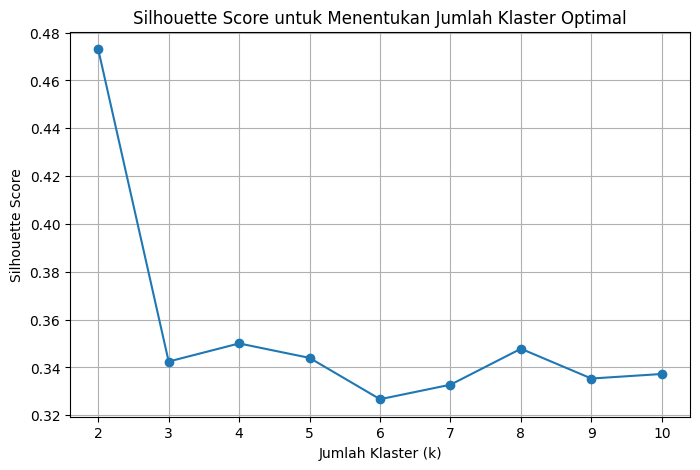

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Misal df_final adalah dataframe Anda yang sudah berisi data lengkap
features = ['langkah', 'jarak', 'menit_aktivitas_berat', 'vo2max_demografis_terfilter']
df_features = df_final[features]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Tentukan jumlah klaster optimal dengan Silhouette Score
sil_scores = []
k_range = range(2, 11)  # mulai dari 2 klaster karena silhouette tidak terdefinisi untuk k=1
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f'Jumlah klaster: {k}, Silhouette Score: {score:.4f}')

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()




In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Load data
df = df_final
# 2. Buat fitur turunan
df['bmr_efficiency'] = df['kalori'] / (df['langkah'] + 1)
df['cardio_efficiency'] = df['kalori'] / (df['jarak'] + 1)
df['stress_score'] = df['detak_jantung_istirahat'] * df['menit_sedentari']
df['std_aktivitas'] = df[['menit_aktivitas_sedang', 'menit_aktivitas_berat']].std(axis=1)

# 3. Fitur per cluster
fitur_metabolic = ['bmr_efficiency', 'cardio_efficiency']
fitur_stress = ['stress_score', 'detak_jantung_per_menit']
fitur_behavior = ['kalori', 'std_aktivitas']

# 4. Fungsi clustering
def clusterize(df, features, n_clusters=3):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    return kmeans.fit_predict(X_scaled)

# 5. Clustering per area
df['cluster_metabolic'] = clusterize(df, fitur_metabolic)
df['cluster_stress'] = clusterize(df, fitur_stress)
df['cluster_behavior'] = clusterize(df, fitur_behavior)

# 6. Lihat hasil
print(df[['cluster_metabolic', 'cluster_stress', 'cluster_behavior']].value_counts())


cluster_metabolic  cluster_stress  cluster_behavior
0                  2               0                   1415
                                   2                   1356
                   0               2                   1311
                   1               2                   1066
                   2               1                    724
                   1               0                    639
                                   1                    233
                   0               0                    224
2                  0               2                    190
1                  0               2                     73
0                  0               1                     58
1                  1               2                     57
                   0               0                     34
2                  1               2                     26
1                  1               0                      3
2                  2               2            

In [ ]:
df_final

,Pengguna,tanggal,kalori,vo2max_demografis_terfilter,jarak,detak_jantung_per_menit,menit_aktivitas_ringan,menit_aktivitas_sedang,menit_aktivitas_berat,menit_sedentari,...,bmi,Cluster,Kategori Aktivitas,bmr_efficiency,cardio_efficiency,stress_score,std_aktivitas,cluster_metabolic,cluster_stress,cluster_behavior
0,pengguna 1,2021-05-24,2351.59,62.792100,6517.500000,71.701565,149.0,24.0,33.0,713.0,...,<19,2,Aktif,0.266198,0.360756,44258.098605,6.363961,0,2,0
1,pengguna 1,2021-05-25,2332.08,62.679120,7178.600000,70.579300,132.0,25.0,31.0,704.0,...,<19,2,Aktif,0.239729,0.324820,43733.519226,4.242641,0,2,0
2,pengguna 1,2021-05-26,2262.30,62.573070,6090.900000,71.842573,112.0,27.0,31.0,710.0,...,<19,2,Aktif,0.274085,0.371362,44207.439280,2.828427,0,2,0
3,pengguna 1,2021-05-27,2325.10,62.474930,6653.100000,71.725477,133.0,21.0,37.0,622.0,...,<19,2,Aktif,0.257886,0.349424,38793.455986,11.313708,0,2,1
4,pengguna 1,2021-05-28,2586.76,62.411660,9557.900000,74.401028,136.0,42.0,45.0,647.0,...,<19,2,Aktif,0.199750,0.270613,40091.619803,2.121320,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,pengguna 63,2021-05-18,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,...,24.0,1,Pasif,0.352270,0.531991,106417.288971,0.000000,0,1,2
7406,pengguna 69,2021-05-20,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,...,>=25,1,Pasif,0.352270,0.531991,106417.288971,0.000000,0,1,2
7407,pengguna 63,2021-05-23,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,...,24.0,1,Pasif,0.352270,0.531991,106417.288971,0.000000,0,1,2
7408,pengguna 45,2021-11-19,1296.00,36.303077,2435.133333,89.258899,0.0,0.0,0.0,1440.0,...,20.0,1,Pasif,0.352270,0.531991,106417.288971,0.000000,0,1,2


In [ ]:
df_cluster_user = df_final[['Pengguna', 'cluster_metabolic', 'cluster_stress', 'cluster_behavior']].copy()
df_cluster_user

,Pengguna,cluster_metabolic,cluster_stress,cluster_behavior
0,pengguna 1,0,2,0
1,pengguna 1,0,2,0
2,pengguna 1,0,2,0
3,pengguna 1,0,2,1
4,pengguna 1,0,2,0
...,...,...,...,...
7405,pengguna 63,0,1,2
7406,pengguna 69,0,1,2
7407,pengguna 63,0,1,2
7408,pengguna 45,0,1,2


In [ ]:
def first_mode(series):
    return series.mode().iloc[0]

df_cluster_user_mode = df_final.groupby('Pengguna')[['cluster_metabolic', 'cluster_stress', 'cluster_behavior']].agg(first_mode).reset_index()


In [ ]:
df_cluster_user_mode

,Pengguna,cluster_metabolic,cluster_stress,cluster_behavior
0,pengguna 1,0,2,0
1,pengguna 10,0,2,0
2,pengguna 11,0,2,2
3,pengguna 12,0,2,0
4,pengguna 13,0,1,0
...,...,...,...,...
66,pengguna 7,0,2,2
67,pengguna 70,0,1,2
68,pengguna 71,0,2,2
69,pengguna 8,0,1,2


# Penjelasan Cluster



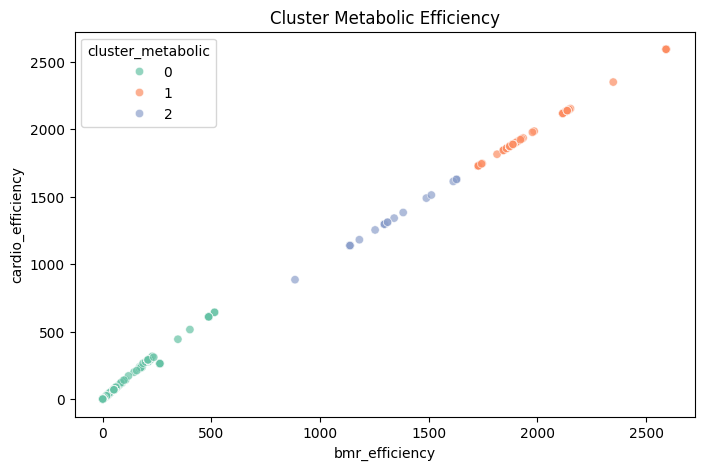


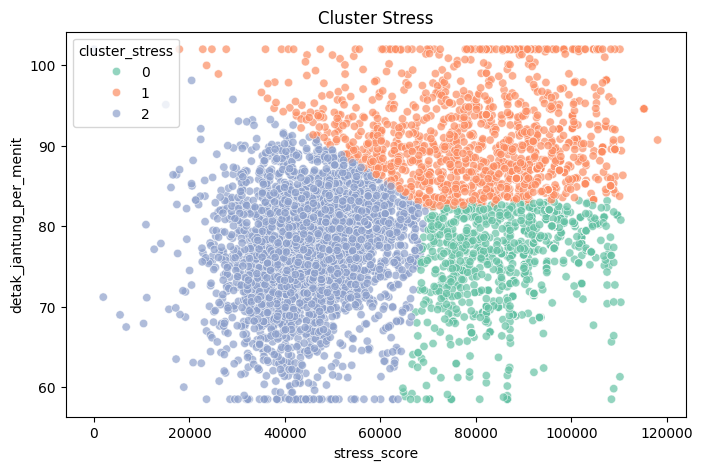


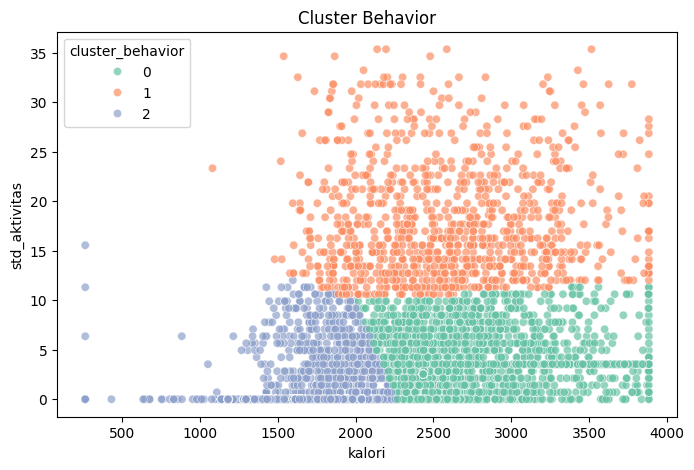


## 1. cluster_metabolic (berdasarkan bmr_efficiency dan cardio_efficiency)  
Cluster 0, 1, 2 adalah grup pengguna yang dibedakan dari efisiensi metabolik mereka:

- **Cluster 0:** Pengguna dengan efisiensi metabolik rendah (bmr_efficiency dan cardio_efficiency kecil) → mungkin aktivitas kalori per langkah dan jarak rendah.  
- **Cluster 1:** Pengguna dengan efisiensi metabolik sedang → kalori terbakar per aktivitas sedang.  
- **Cluster 2:** Pengguna dengan efisiensi metabolik tinggi → kalori terbakar per langkah dan jarak lebih tinggi, artinya metabolisme dan aktivitas kardio mereka lebih efisien.

## 2. cluster_stress (berdasarkan stress_score dan detak_jantung_per_menit)  
Mengelompokkan pengguna berdasarkan stres fisik/psikis dan detak jantung:

- **Cluster 0:** Pengguna dengan skor stres rendah dan detak jantung per menit lebih stabil → tingkat stres rendah.  
- **Cluster 1:** Pengguna dengan tingkat stres sedang.  
- **Cluster 2:** Pengguna dengan stres tinggi (detak jantung dan menit sedentari tinggi) → bisa jadi ini yang paling membutuhkan intervensi manajemen stres.

## 3. cluster_behavior (berdasarkan kalori dan std_aktivitas)  
Mengelompokkan berdasarkan pola perilaku aktivitas dan konsumsi kalori:

- **Cluster 0:** Pola aktivitas rendah dan kalori relatif sedikit → mungkin pengguna dengan gaya hidup lebih sedentari.  
- **Cluster 1:** Pola aktivitas sedang.  
- **Cluster 2:** Pola aktivitas tinggi dan kalori terbakar lebih besar → pengguna aktif dan lebih banyak bergerak.


Clusterisasi Kategori Resiko Kematian

In [ ]:
import pandas  as pd
df_ = pd.read_csv('df_final.csv')

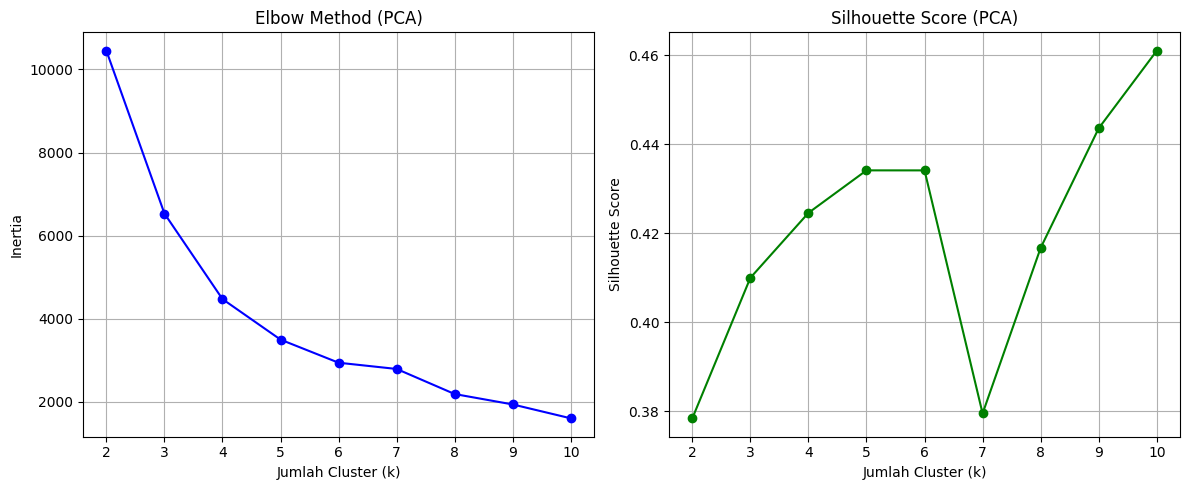

Rata-rata per cluster:
         menit_sedentari  detak_jantung_istirahat
cluster                                          
0            1265.733050                65.994219
1             710.030362                63.987767
2            1271.262598                69.480692
3            1312.111244                71.933812
4             734.409925                63.774337

Cluster dengan risiko tertinggi: 3

Baris data pada cluster Highly Sedentary:
<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 71 to 7406
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     836 non-null    int64  
 1   Pengguna                       836 non-null    object 
 2   tanggal                        836 non-null    object 
 3   kalori                         836 non-null    float64
 4   vo2max_demografis_terfilter    836 non-null    float64
 5   jarak                

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = df_.copy()
le_usia = LabelEncoder()
le_bmi = LabelEncoder()
X['usia_enc'] = le_usia.fit_transform(X['usia'])
X['bmi_enc'] = le_bmi.fit_transform(X['bmi'])

X_num = X[['menit_sedentari', 'detak_jantung_istirahat', 'usia_enc', 'bmi_enc']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette = silhouette_score(X_pca, labels)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method (PCA)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (PCA)')
plt.grid(True)

plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df_['cluster'] = clusters

cluster_stats = df_.groupby('cluster')[['menit_sedentari', 'detak_jantung_istirahat']].mean()
print("Rata-rata per cluster:")
print(cluster_stats)

high_sedentary_cluster = cluster_stats.mean(axis=1).idxmax()
print(f"\nCluster dengan risiko tertinggi: {high_sedentary_cluster}")

hasil = df_[df_['cluster'] == high_sedentary_cluster]
print("\nBaris data pada cluster Highly Sedentary:")
print(hasil.info())

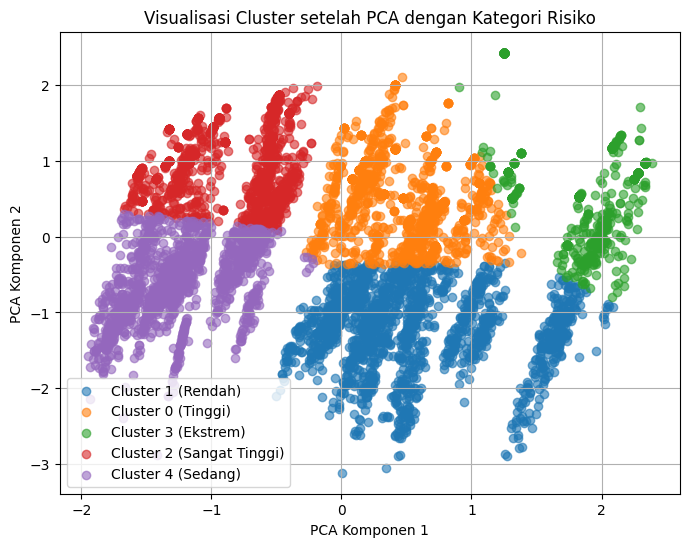

In [ ]:
import numpy as np

plt.figure(figsize=(8, 6))

cluster_risk_mean = cluster_stats.mean(axis=1)
sorted_clusters = cluster_risk_mean.sort_values().index.tolist()

risk_levels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi', 'Ekstrem']
cluster_to_label = {cluster: risk_levels[i] for i, cluster in enumerate(sorted_clusters)}

for cluster in df_['cluster'].unique():
    idx = df_['cluster'] == cluster
    label = cluster_to_label[cluster]
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Cluster {cluster} ({label})', alpha=0.6)

plt.title('Visualisasi Cluster setelah PCA dengan Kategori Risiko')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.legend()
plt.grid(True)
plt.show()